# Cleaning

## Loader le contexte

In [291]:
# import them
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt
import scipy.stats as stats


In [292]:
df = pd.read_csv("./results/df_builded.csv")

In [293]:
df.columns

Index(['Model Year', 'Test Veh Configuration', 'Test Veh Displacement (L)',
       'Rated Horsepower', 'Number of Cylinders and Rotors', 'Number of Gears',
       'Transmission Overdrive Code', 'Axle Ratio', 'N/V Ratio',
       'Shift Indicator Light Use Cd', 'ADFE Total Road Load HP',
       'ADFE Equiv. Test Weight (lbs.)', 'ADFE N/V Ratio', 'Test Procedure Cd',
       'Test Fuel Type Cd', 'FE Bag 1', 'FE Bag 2', 'FE Bag 3', 'FE Bag 4',
       'DT-Inertia Work Ratio Rating', 'DT-Absolute Speed Change Ratg',
       'DT-Energy Economy Rating', 'Target Coef A (lbf)',
       'Target Coef B (lbf/mph)', 'Target Coef C (lbf/mph**2)',
       'Set Coef A (lbf)', 'Set Coef B (lbf/mph)', 'Set Coef C (lbf/mph**2)',
       'Averaging Weighting Factor', 'litre pour 100km', 'Weight (kg)',
       'grammes equivalent CO2/km', 'Number of wheel',
       'Equivalent Test Weight (kg)', 'Gear ratio',
       'Veh Mfr Code Mean Encoding', 'Transmission Type Mean Encoding',
       'Rear Type_0.0', 'Rear Type

## Valeures nulles



* identifier les valeurs nulles
* identifier si être une valeur null est une valeur en soit (*1)
* traiter ces valeurs nulles (suppression de la ligne? ajout d'une valeur artificielle?)


*1
Une valeur nulle peut-être une valeur en soit. Par exemple pour une colonne nombre d'accident, si il n'y a pas de valeur c'est peut-être qu'il n'y a pas eu d'acident...

### Identifier les valeurs nulles

#### valeur null null

On calcule les ratios de valeurs nulles avec la formule: 
$$
\text{Ratio} = \frac{\text{Nombre de valeures manquantes}}{\text{Taille de l'échantillon}}
$$

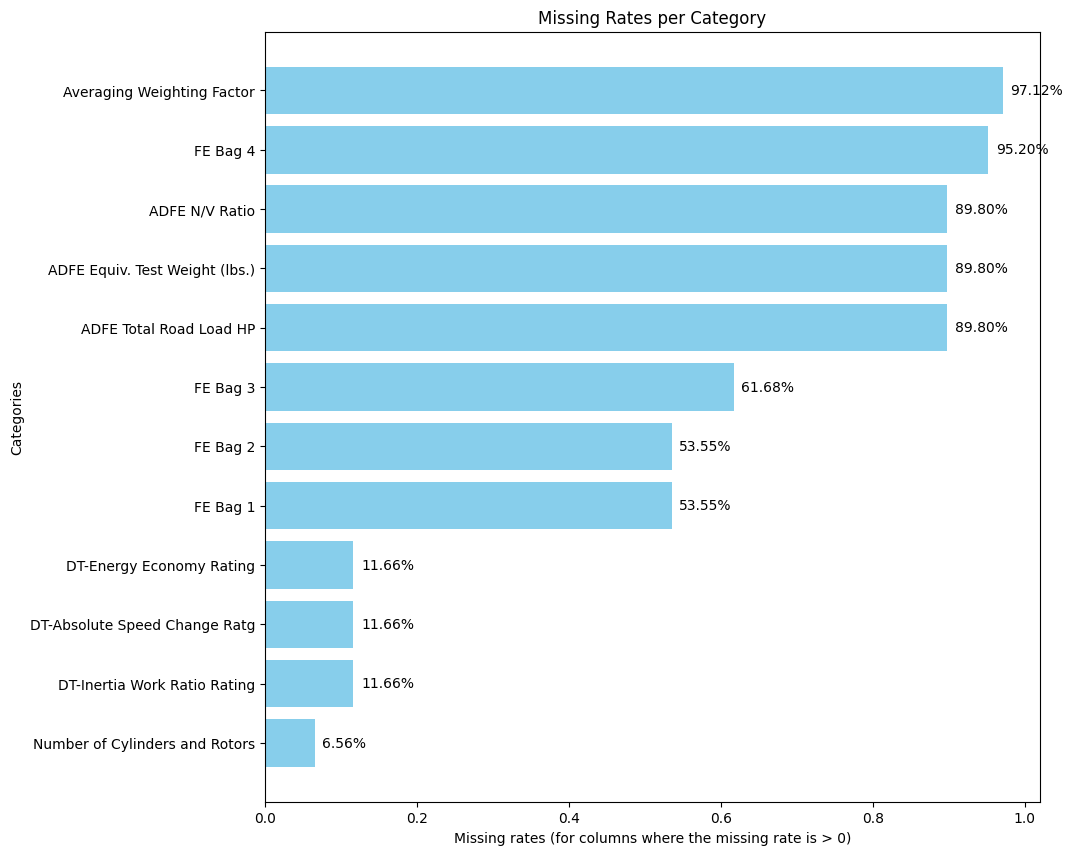

In [294]:
# count number of null values each column

missing_rates = []
# for every columns with more than 50% of missing values, print the column name
for column in df.columns:
    missing_rate = df[column].isnull().sum()/df.shape[0]
    missing_rates.append([column, missing_rate])
#bar plot of missing rate
missing_rates = sorted([x for x in missing_rates if x[1]>0], key=lambda x: x[1])
plt.figure(figsize=(10, 10))
bars = plt.barh([x[0] for x in missing_rates], [x[1] for x in missing_rates], color='skyblue')
plt.xlabel('Missing rates (for columns where the missing rate is > 0)')
plt.ylabel('Categories')
plt.title('Missing Rates per Category')

# Add missing rate values as text labels
for bar, (_, rate) in zip(bars, missing_rates):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{rate:.2%}', va='center')

plt.show()
        

### Mesurer l'impact des valeurs nulles sur les colonnes

* mesure de l'impact sur la colonne à prédire (*1)

*1 
On suppose que si la moyenne ne change pas c'est que les valeurs nulles sont ditribuées uniformémant (donc pas trop de problème) mais si elle change on peut alors faire l'hypothèse qu'une type d'individu existant à souvent une valeur nulle pour un caractéristique (par exemple le filte du pot d'échappement pour une voiture électrique)

In [295]:
# Ici on décide d'être très rapide, on supprime toutes les colonnes qui ont plus de 50 % de valeurs manquantes
df = df.dropna(thresh=df.shape[0]*0.5, axis=1)

### Mesurer l'impact des valeurs nulles sur les lignes

* construction d'un dataset sans valeur nulle
* mesure de l'impact sur le nombre d'enregistrement
* mesure de l'impact sur la colonne à prédire (*1)

*1 
On suppose que si la moyenne ne change pas c'est que les valeurs nulles sont ditribuées uniformémant (donc pas trop de problème) mais si elle change on peut alors faire l'hypothèse qu'une type d'individu existant à souvent une valeur nulle pour un caractéristique (par exemple le filte du pot d'échappement pour une voiture électrique)

#### Création d'un dataset sans valeur nulles


In [296]:
# Pour étudier les valeurs nulles, on isole un dataframe en ayant aucune et un en ayant. On comparera alors leurs valeurs.
df_not_null = df.dropna(subset=df.columns)

#### impact sur le nombre de données

In [297]:
print(f"Dimension du dataframe sans valeurs nulles : {df_not_null.shape}")
print(f"Dimension du dataframe avec valeurs nulles : {df.shape}")

Dimension du dataframe sans valeurs nulles : (34139, 39)
Dimension du dataframe avec valeurs nulles : (39182, 39)


#### impact sur la moyenne

In [298]:
print(f"Moyenne de la consommation de carburant pour les voitures sans valeurs nulles : {df_not_null['grammes equivalent CO2/km'].mean()}")
print(f"Moyenne de la consommation de carburant pour les voitures avec valeurs nulles : {df['grammes equivalent CO2/km'].mean()}")

Moyenne de la consommation de carburant pour les voitures sans valeurs nulles : 509.06986381559204
Moyenne de la consommation de carburant pour les voitures avec valeurs nulles : 469.78158245081477


#### impact sur la répartition des données

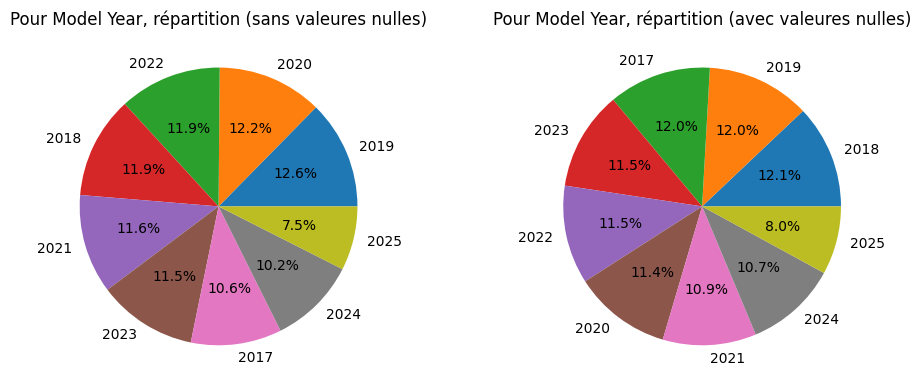

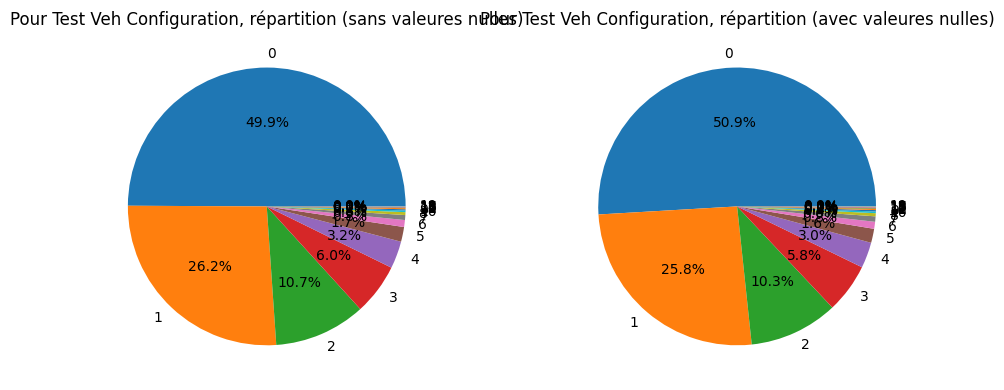

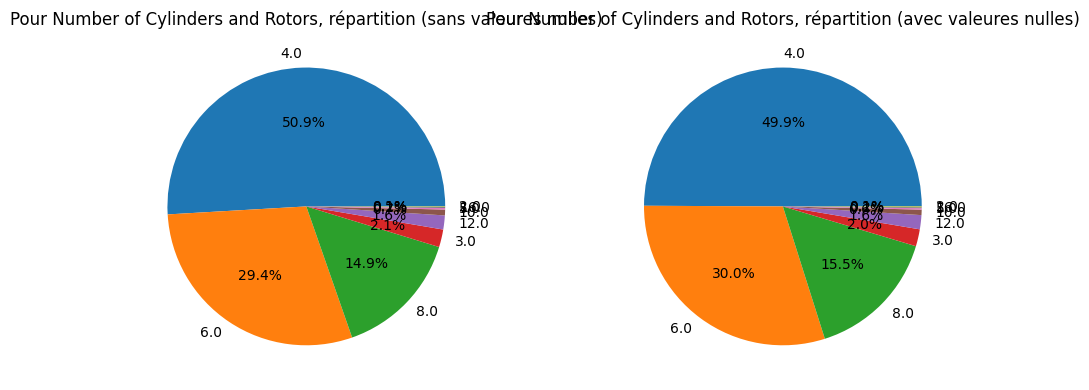

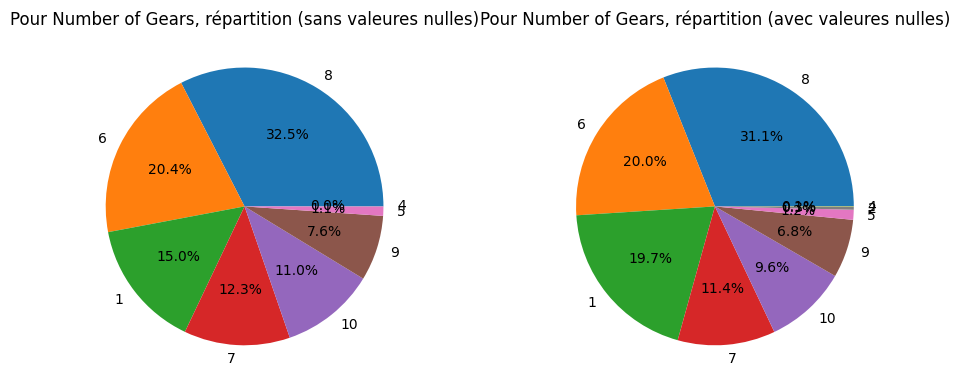

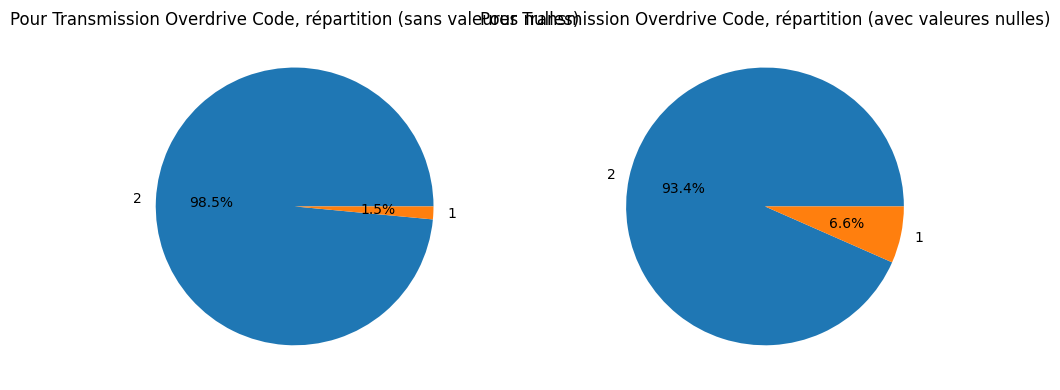

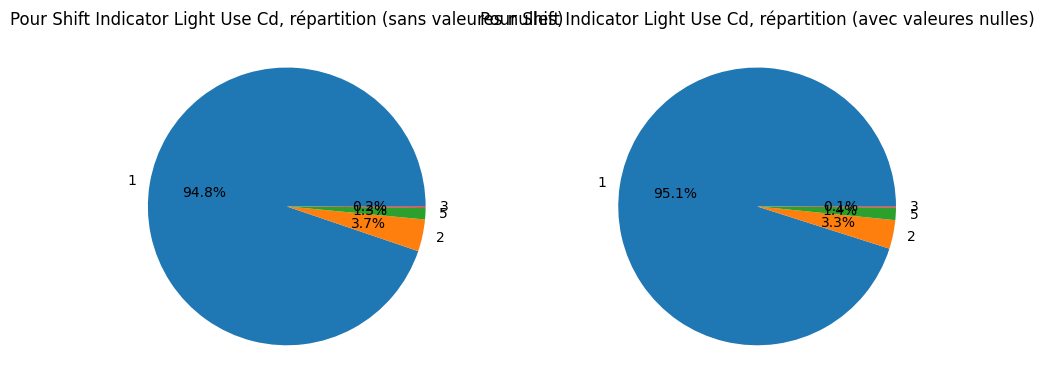

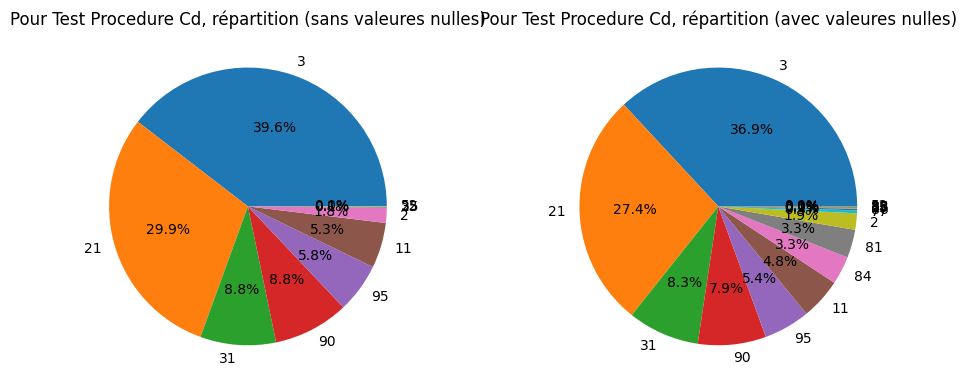

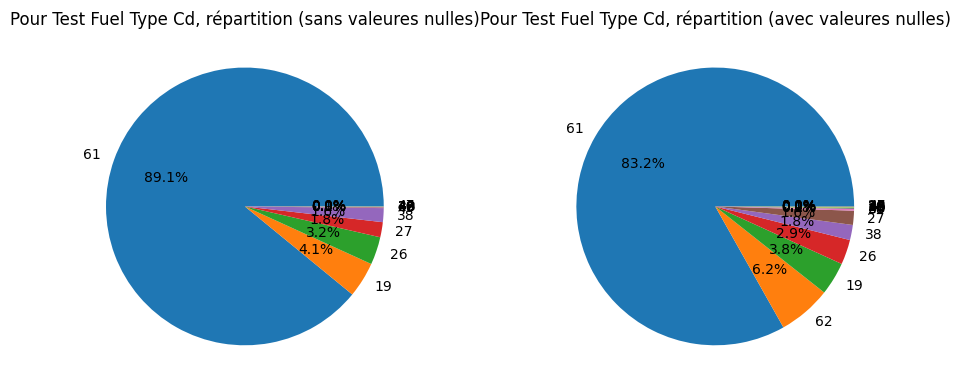

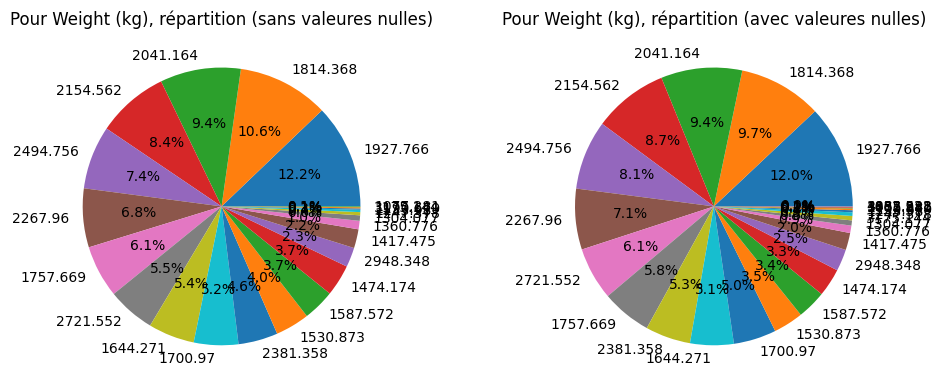

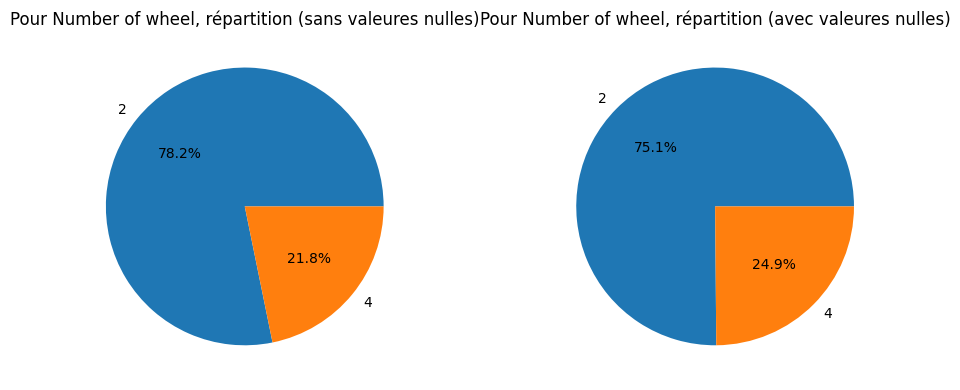

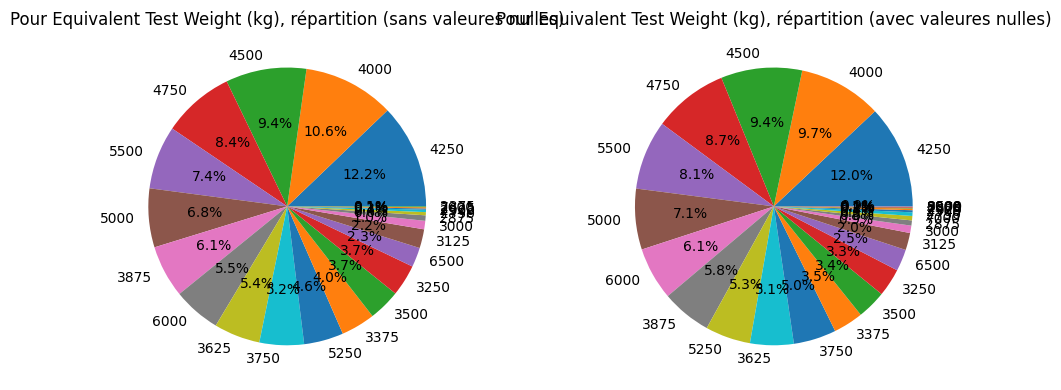

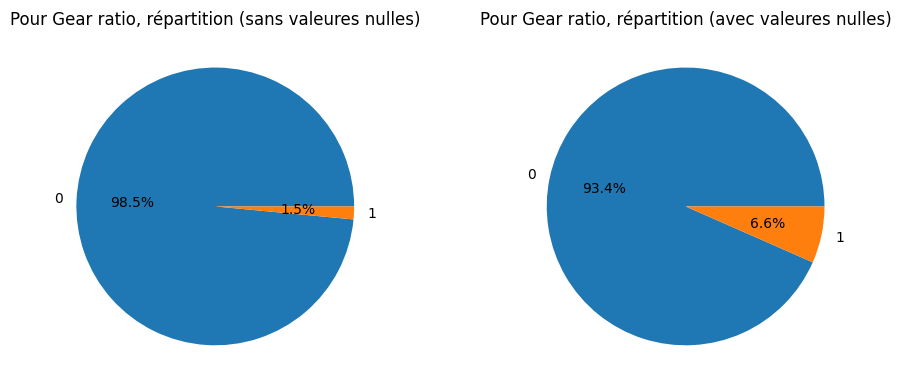

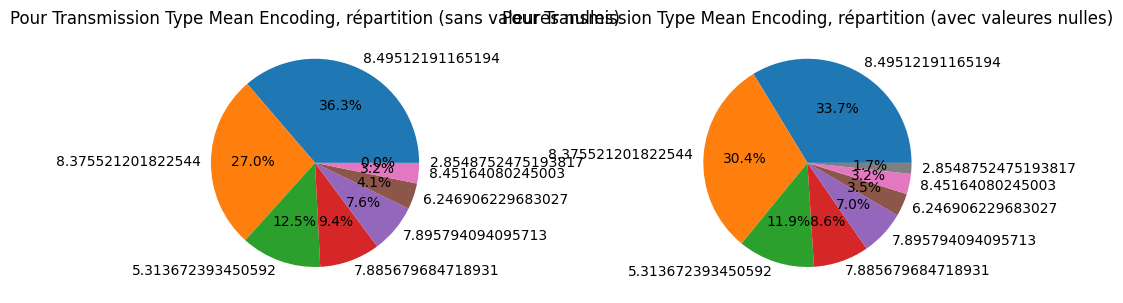

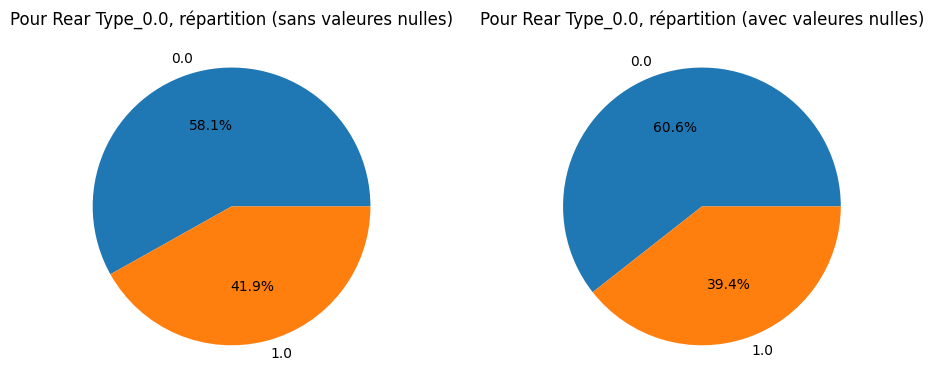

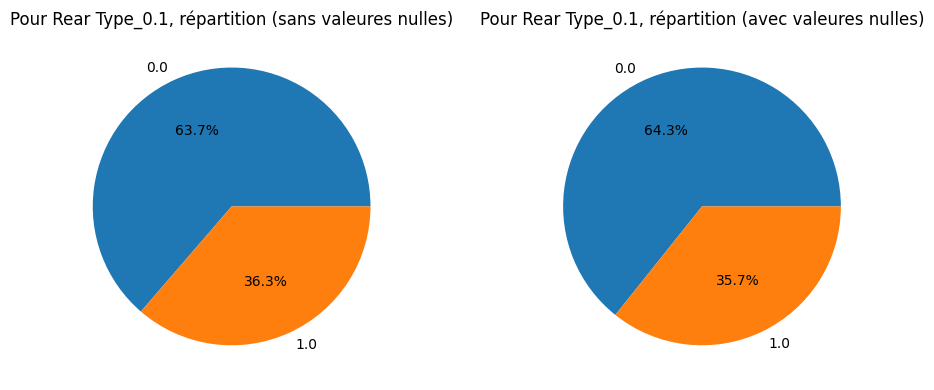

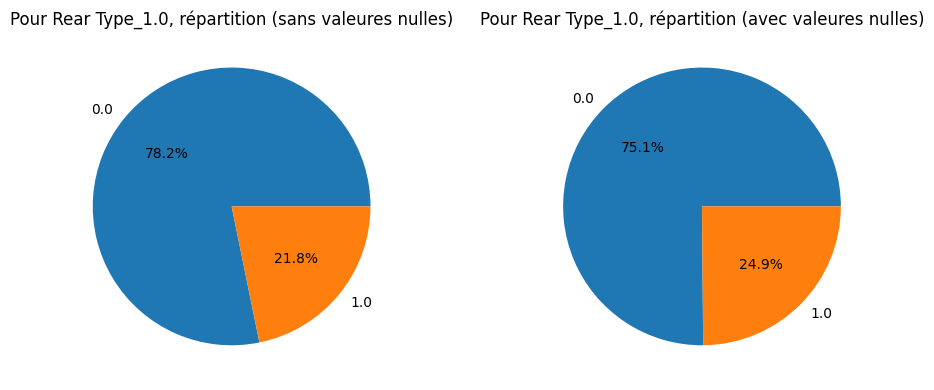

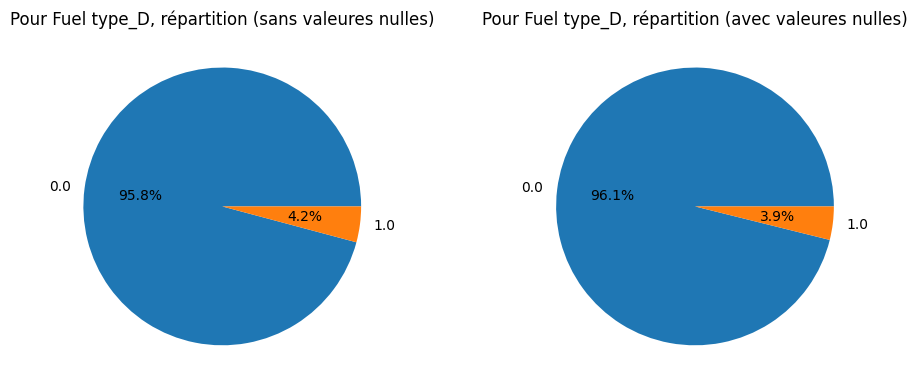

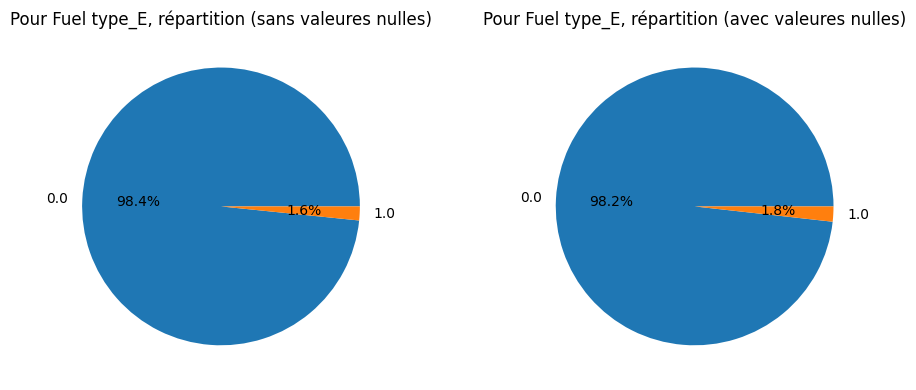

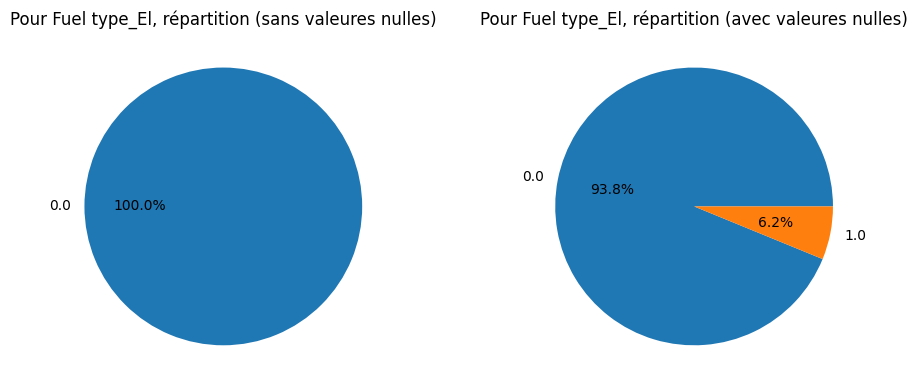

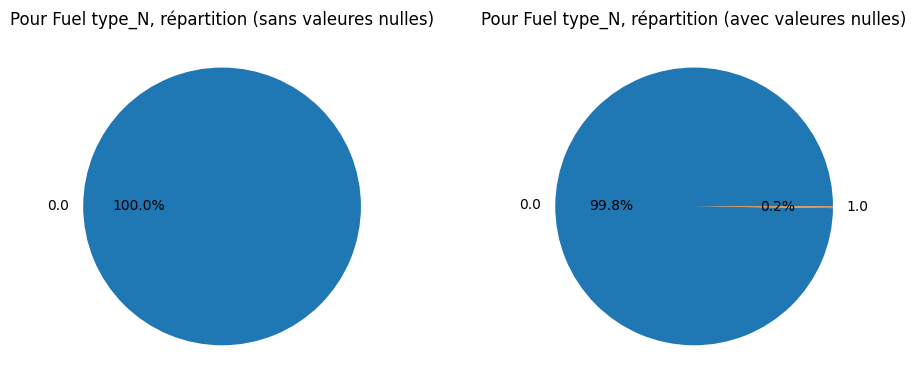

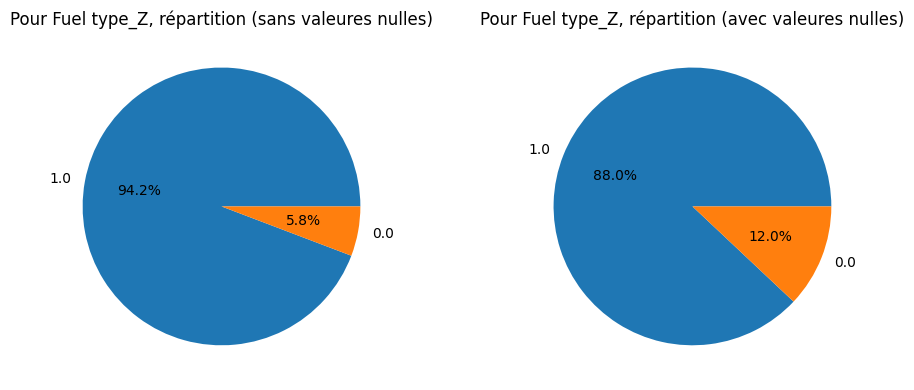

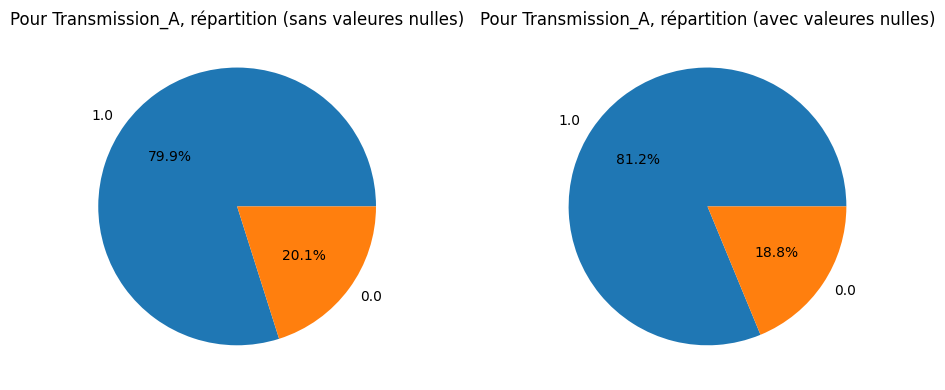

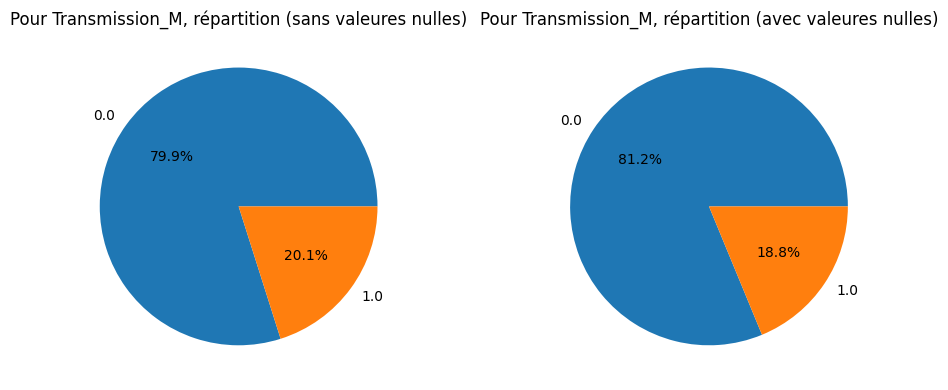

In [299]:


# On lance une évaluation pour voir les différences sur les proportions


df_special = df[df["grammes equivalent CO2/km"]<10] #df_not_null

for column in df.columns:
    if df[column].nunique()<50:
        # if the repartition of values is different, print them in a pie plot
        fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns for side-by-side plots
        
        # Whole dataset pie chart
        axes[0].pie(df_not_null[column].value_counts(), 
                    labels=df_not_null[column].value_counts().index, 
                    autopct='%1.1f%%')
        axes[0].set_title(f"Pour {column}, répartition (sans valeures nulles)")
        
        # Not-null values pie chart
        axes[1].pie(df[column].value_counts(), 
                    labels=df[column].value_counts().index, 
                    autopct='%1.1f%%')
        axes[1].set_title(f"Pour {column}, répartition (avec valeures nulles)")
        
        # Adjust layout and display
        plt.tight_layout()
        plt.show()
    


#### 0 ou valeur nulle?

* on observe quelles colonnes ont des 0
* pourquoi elles ont des 0
* on conclue

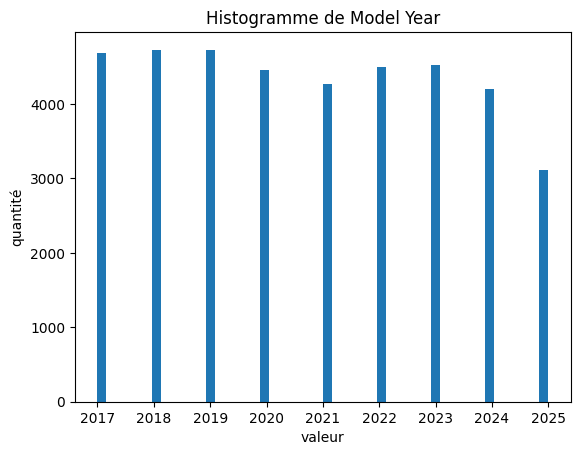

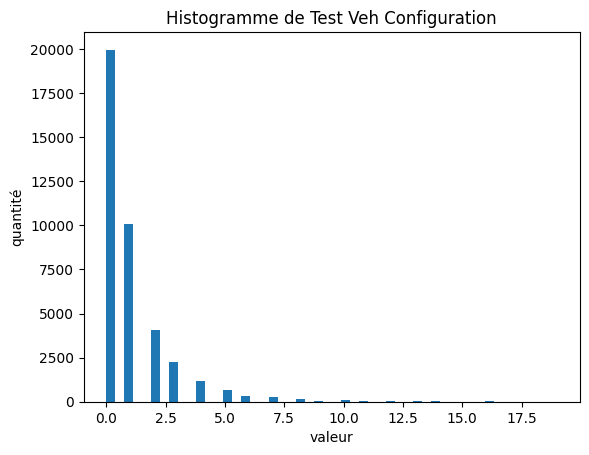

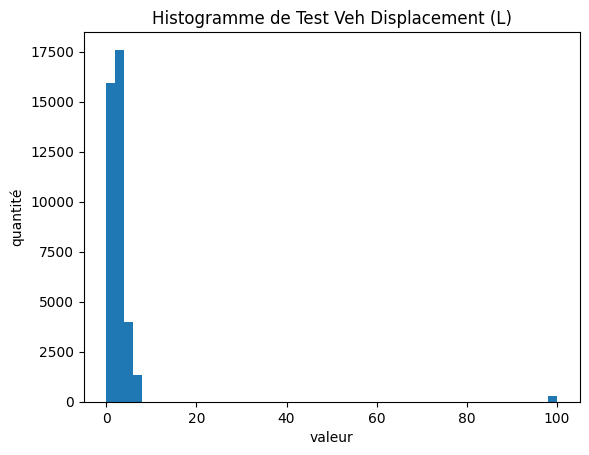

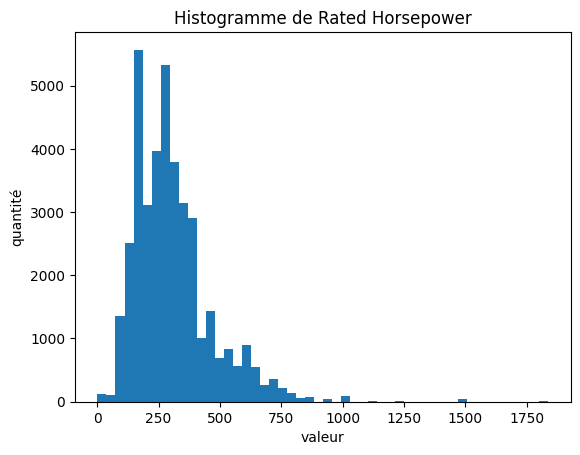

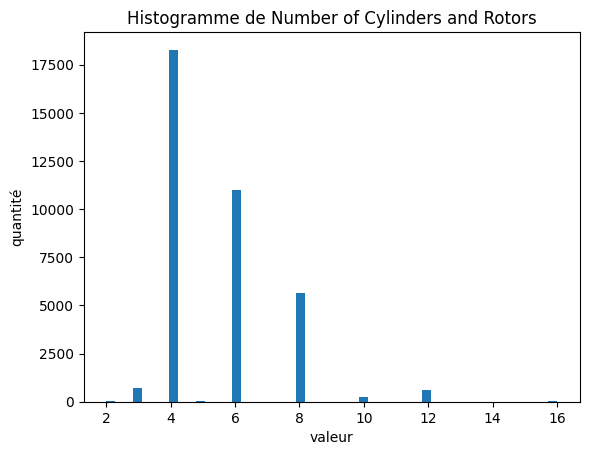

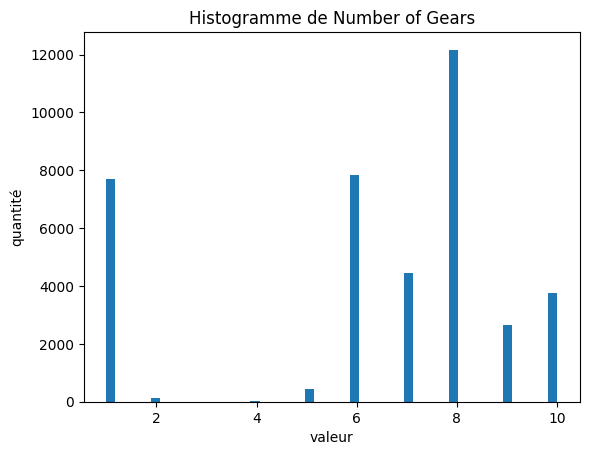

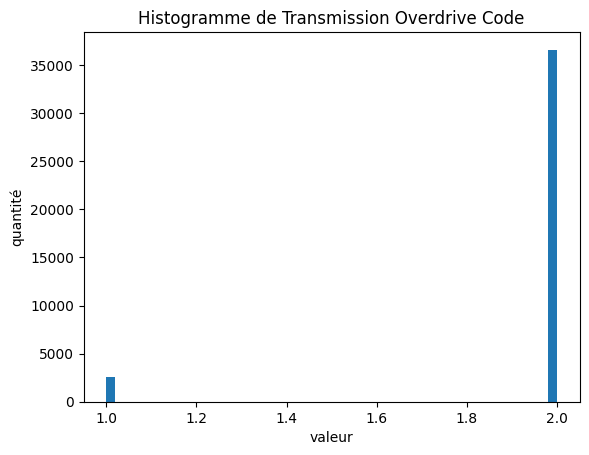

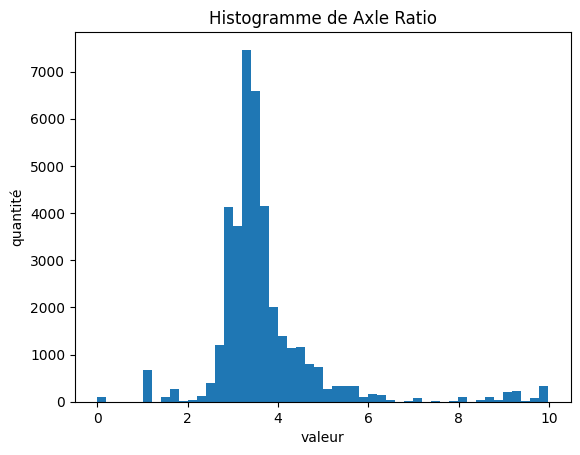

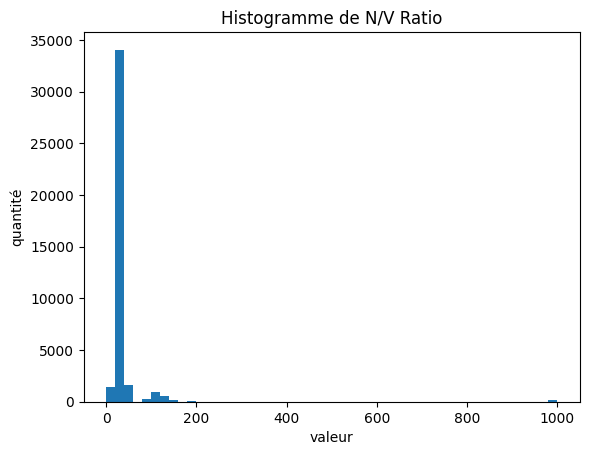

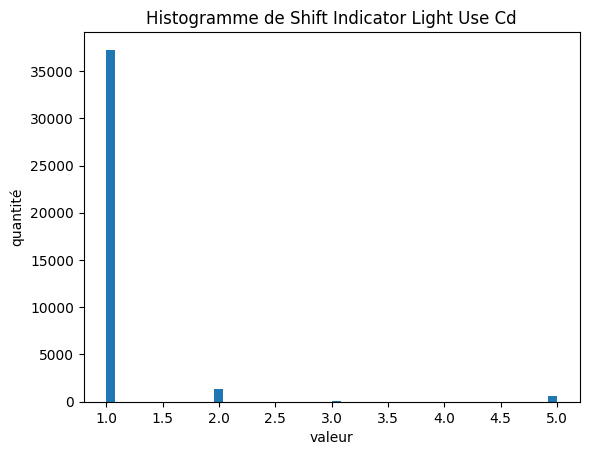

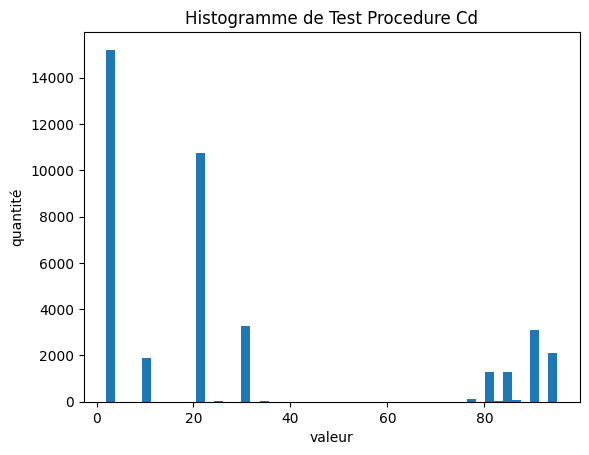

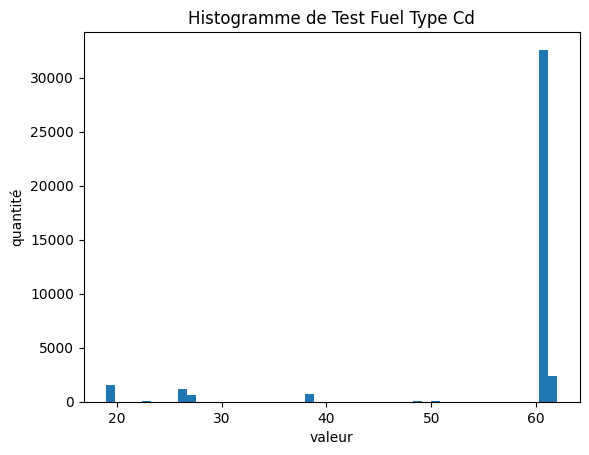

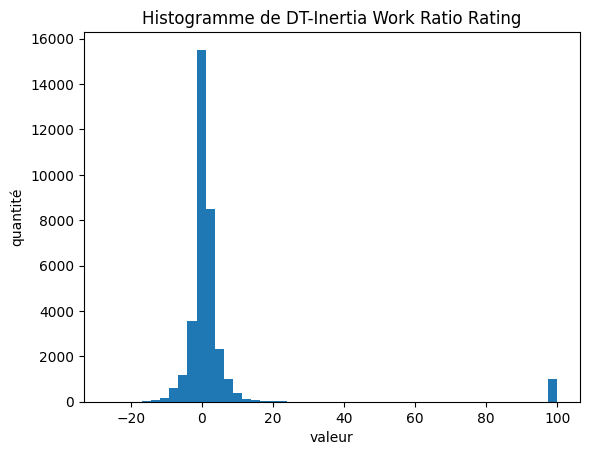

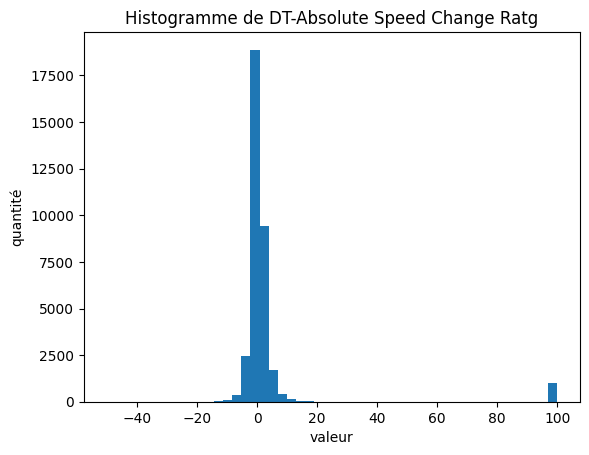

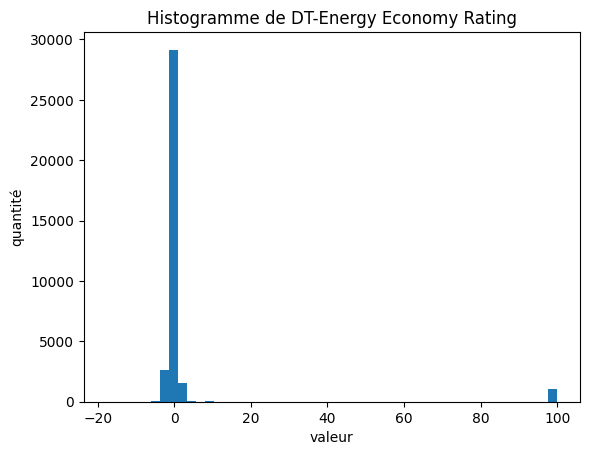

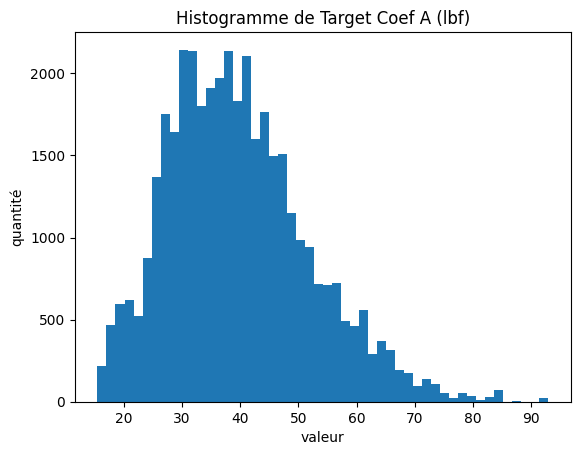

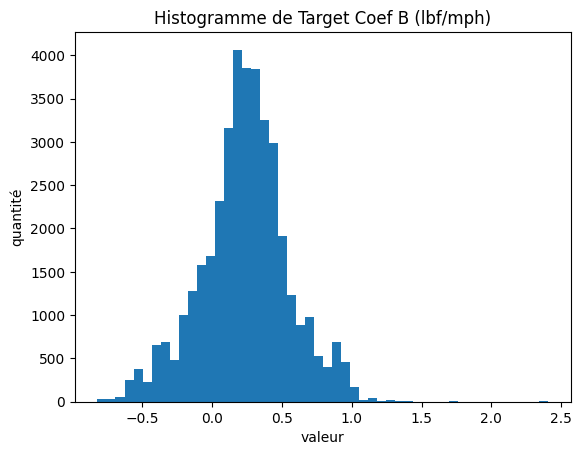

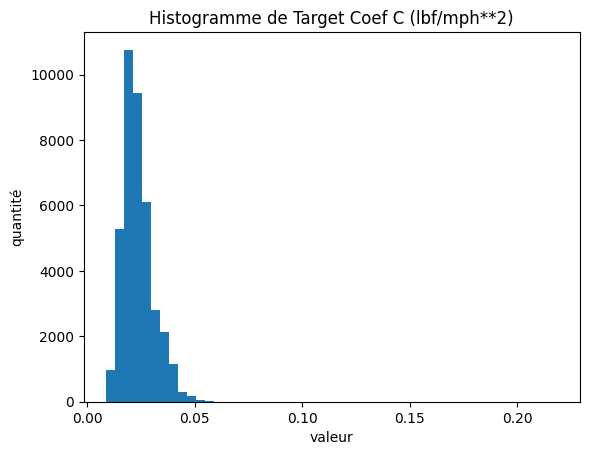

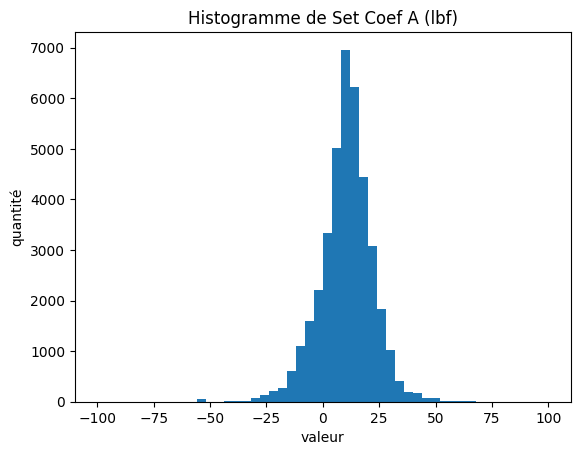

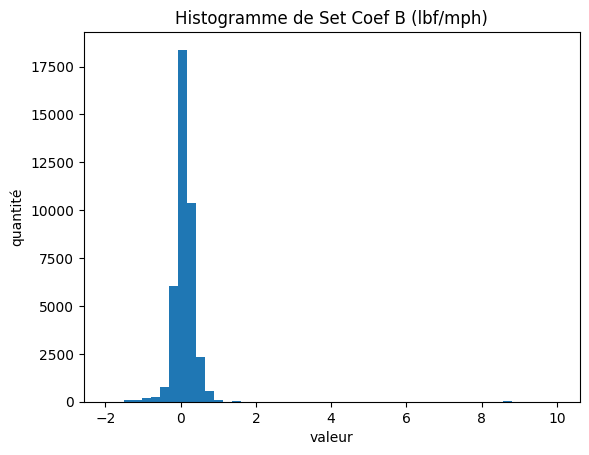

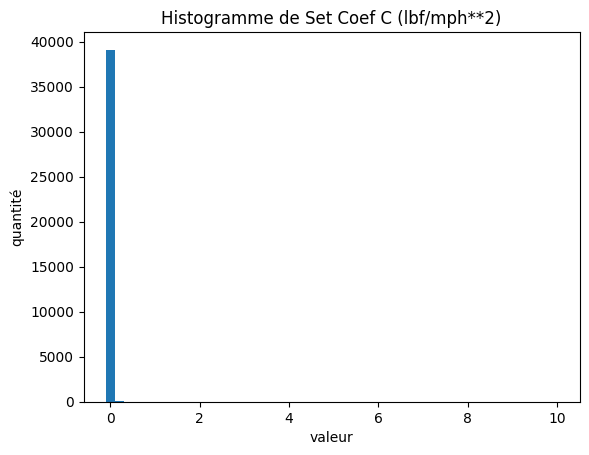

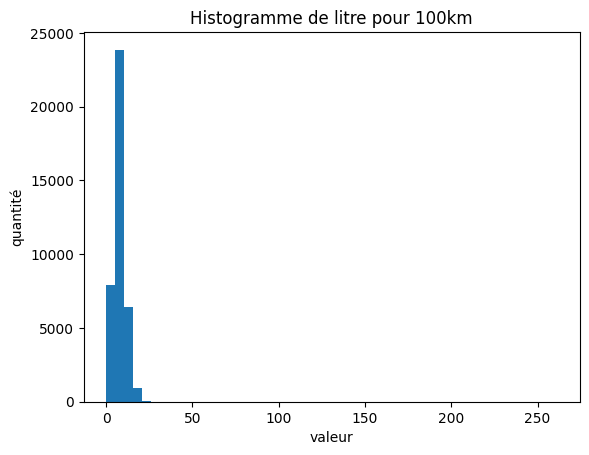

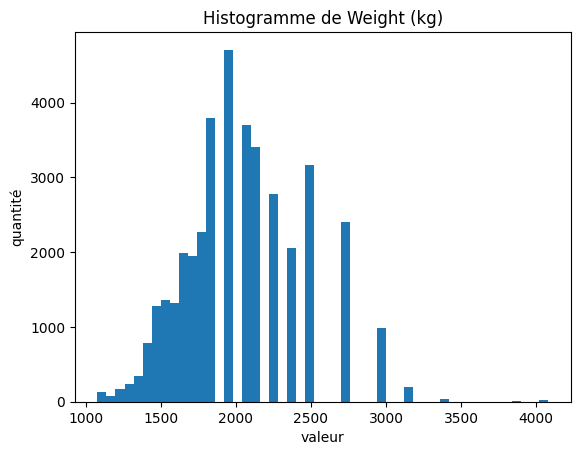

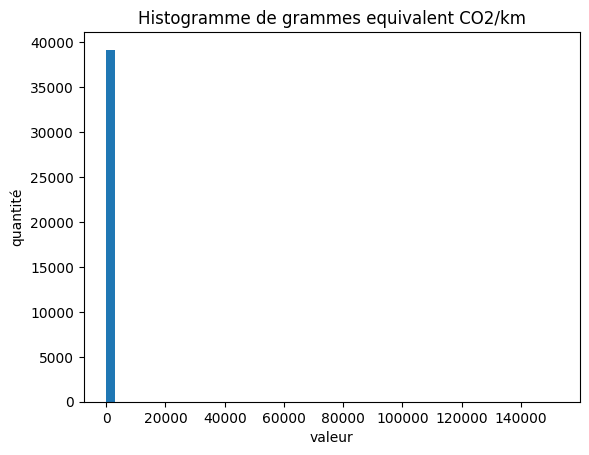

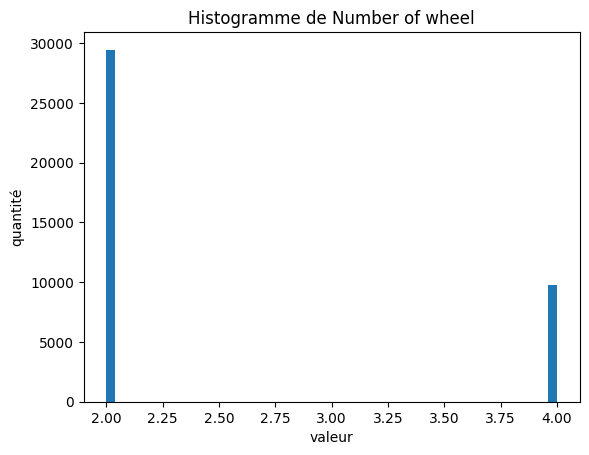

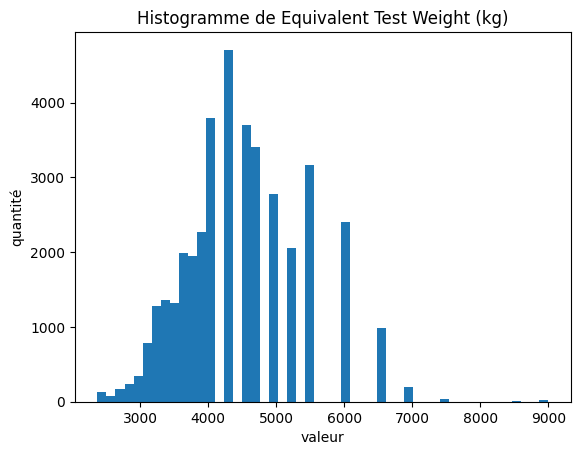

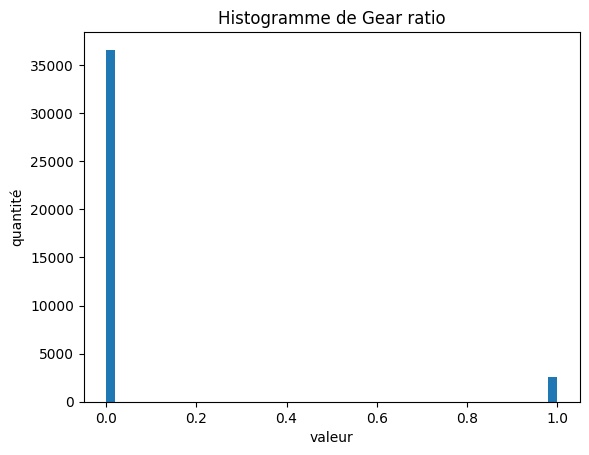

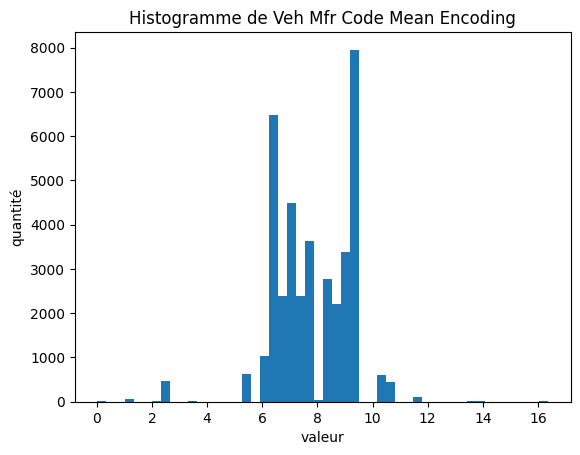

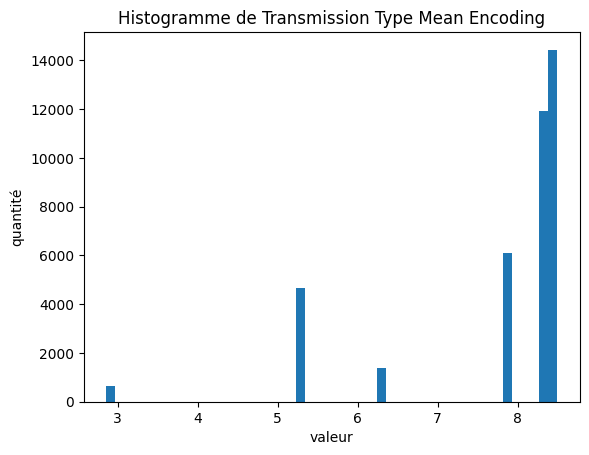

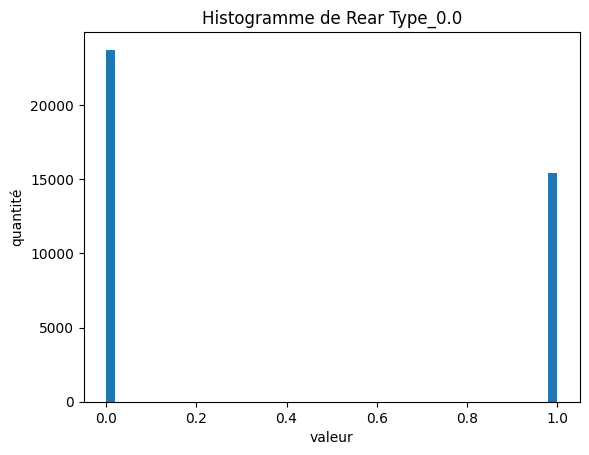

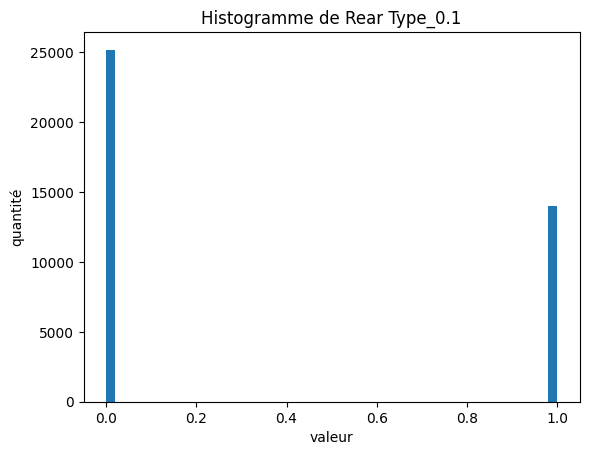

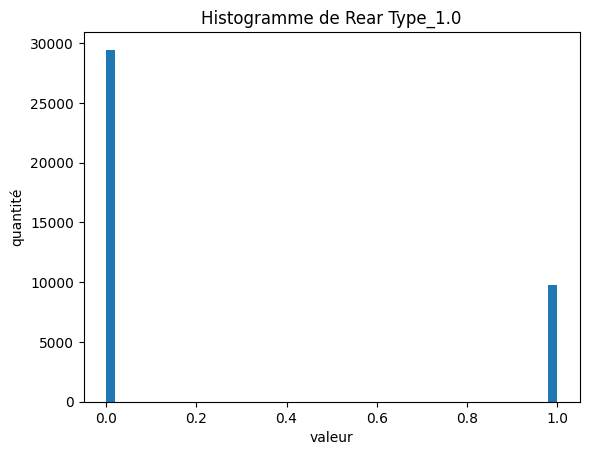

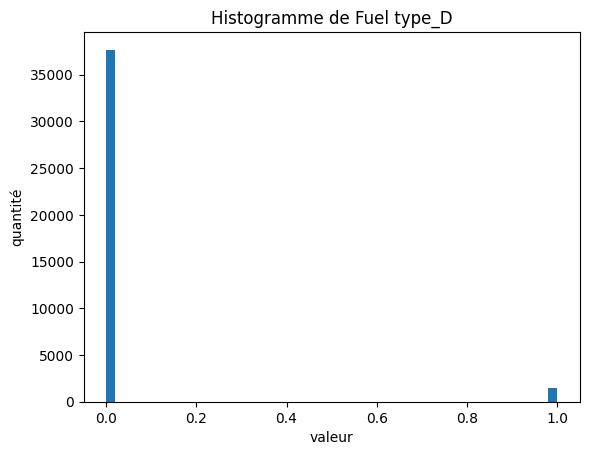

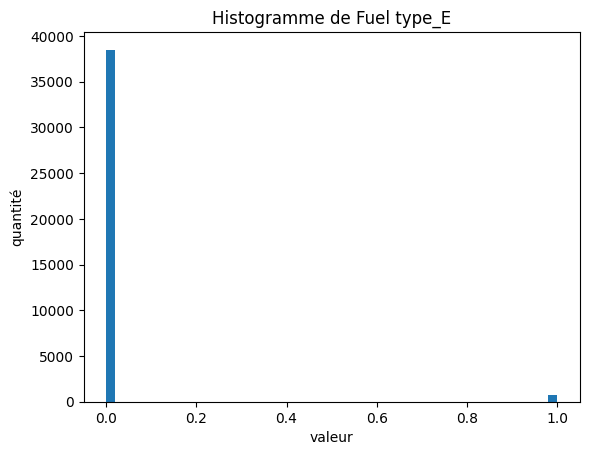

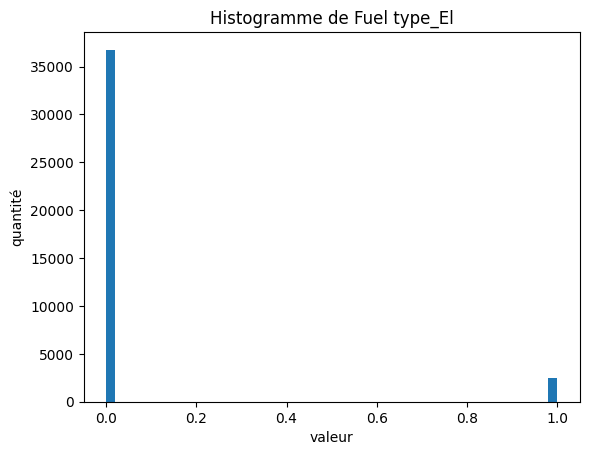

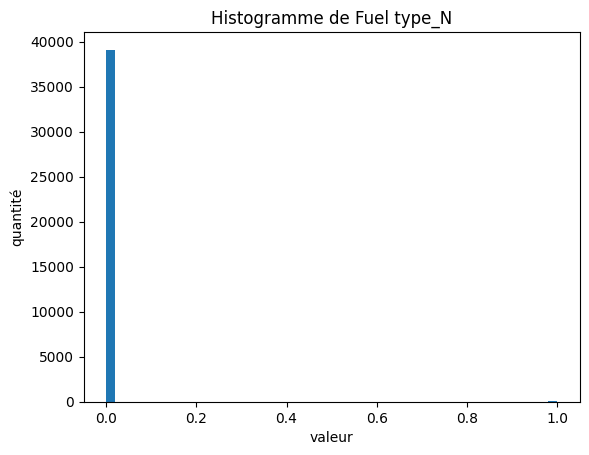

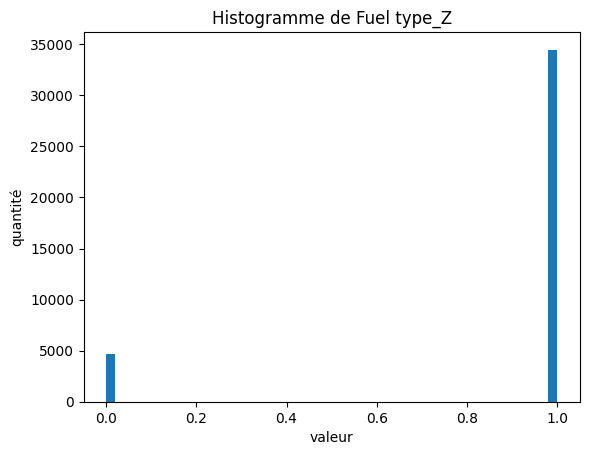

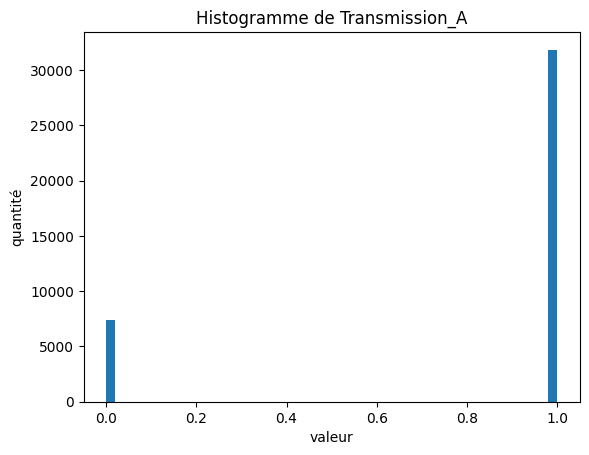

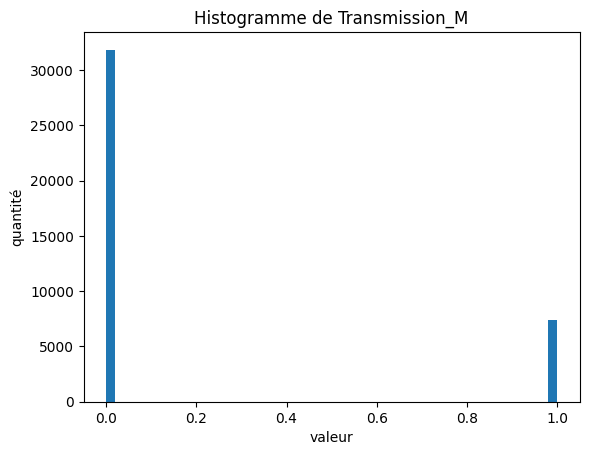

In [300]:
for column in df:
    plt.hist(df[column], bins=50)
    plt.xlabel("valeur")
    plt.ylabel('quantité')
    plt.title(f"Histogramme de {column}")
    plt.show()

In [301]:
print(df[df["grammes equivalent CO2/km"]<50]["Fuel type_N"].value_counts())
print(df[df["grammes equivalent CO2/km"]<50]["Fuel type_El"].value_counts())

#df[df["grammes equivalent CO2/kma"]<50].to_csv("df_less_50.csv", index=False)


Fuel type_N
0.0    3208
1.0      76
Name: count, dtype: int64
Fuel type_El
1.0    2425
0.0     859
Name: count, dtype: int64


In [302]:
# print the correlations of df[df["grammes equivalent CO2/km"]<50] bigger than 0.5 or less than -0.5
#print(df[df["grammes equivalent CO2/km"]<50].corr())
# order the correlation in descending order
correlation = df[df["grammes equivalent CO2/km"]<50].corr()
correlation = correlation.stack().reset_index()
correlation.columns = ['Variable 1', 'Variable 2', 'Correlation']
correlation['abs_correlation'] = correlation['Correlation'].abs()
correlation = correlation[correlation['abs_correlation'] > 0.5]
correlation = correlation.sort_values(by='abs_correlation', ascending=False)
print(tabulate(correlation, headers='keys', tablefmt='psql'))

+------+---------------------------------+---------------------------------+---------------+-------------------+
|      | Variable 1                      | Variable 2                      |   Correlation |   abs_correlation |
|------+---------------------------------+---------------------------------+---------------+-------------------|
|  939 | Number of wheel                 | Rear Type_1.0                   |      1        |          1        |
| 1198 | Rear Type_1.0                   | Number of wheel                 |      1        |          1        |
| 1434 | Transmission_M                  | Transmission_A                  |     -1        |          1        |
| 1397 | Transmission_A                  | Transmission_M                  |     -1        |          1        |
|  893 | grammes equivalent CO2/km       | grammes equivalent CO2/km       |      1        |          1        |
|   39 | Test Veh Configuration          | Test Veh Configuration          |      1        |    

On note les colonnes:
* Test Veh Configuration
* CO2 (eqg/mi)
CO2 c'est surprenant, Test Veh COnfiguration est une colonne illisible

#### Enregistrement des modifications

In [303]:
def electrique_and_hydrogen(row):
    if row["Fuel type_El"] == 1 or row["Fuel type_N"] == 1:
        for col in row.index:  # Iterate over columns
            if pd.isna(row[col]):  # Check for NaN (None values are treated as NaN in Pandas)
                row[col] = df[col].mean()  # Replace with column mean
    return row
df = df.apply(electrique_and_hydrogen, axis=1)

df = df.dropna()
df.drop(columns=["Test Veh Configuration"], inplace=True)

### On retire les doublons

In [304]:
doublons = df.duplicated()
print(f"Nombre de doublons : {doublons.sum()}")
df = df.drop_duplicates()

Nombre de doublons : 1397


## Type de distribution

* identifier si la distribution est normale
* si la distribution est normal, l'analyse des valeures extrêmes n'est plus la même!

## Valeurs extrêmes - distribution normale

* identifier les valeurs extrêmes (in utilise le z-score)
* expliquer l'utilité (ou non) de ces valeurs extrêmes (*1)

*1:

Une valeur extrême (rare et hors norme) peut être très utile lorsque l'évènement associé et aussi rare et hors norme. Il y a peu de cancer mortelle mais lorsqu'il y a un cancer mortelle il faut absolument l'identifier. Ici, la valeur "mortelle" est extrême ET nécessaire. Il faut donc systématiquement trouver l'origine des valeures extrêmes (erreur dans la mesure ou réalité).


In [305]:
normal_distribution_cols = []

#### Identification des distribution normales

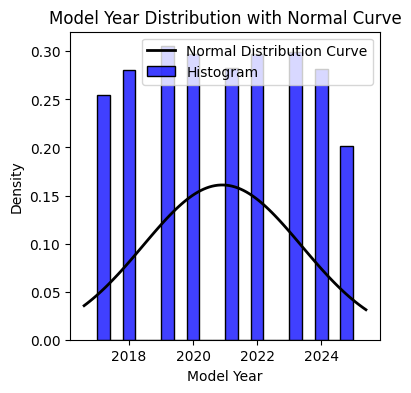

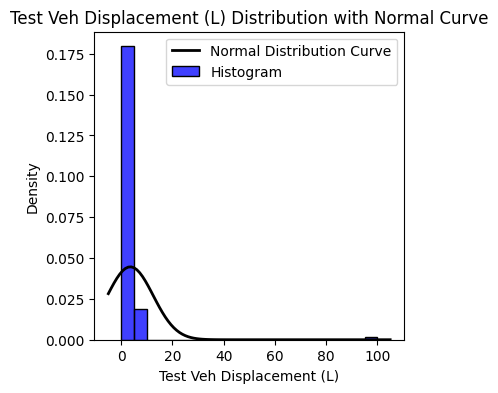

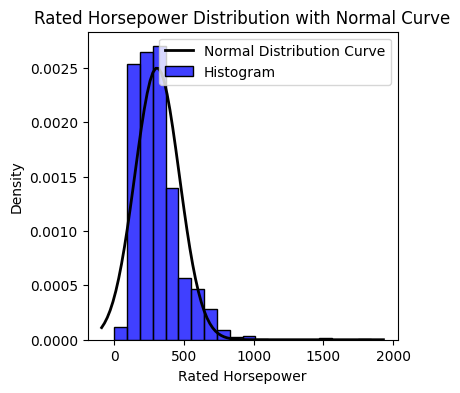

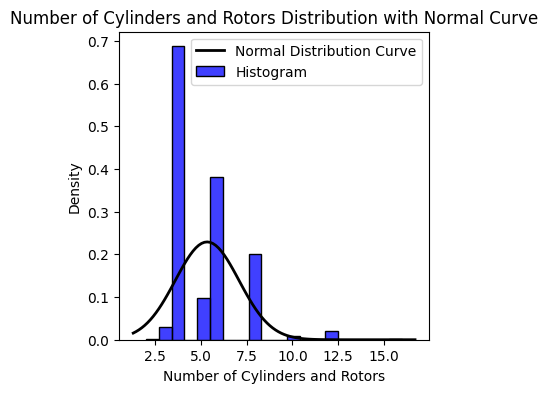

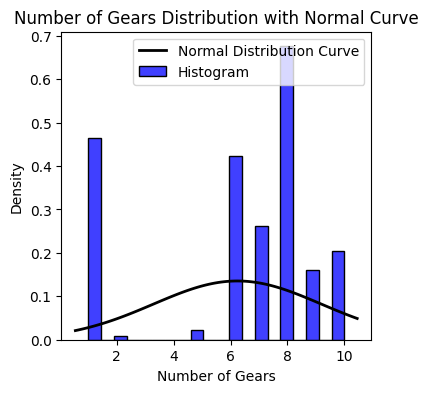

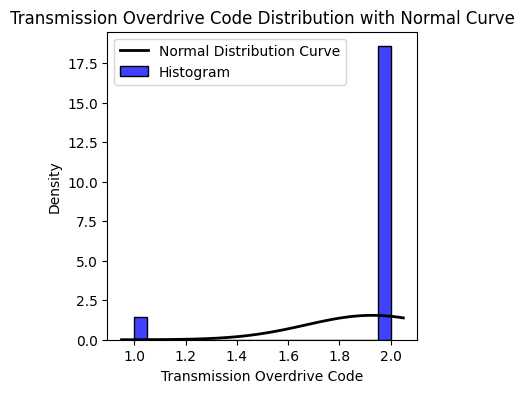

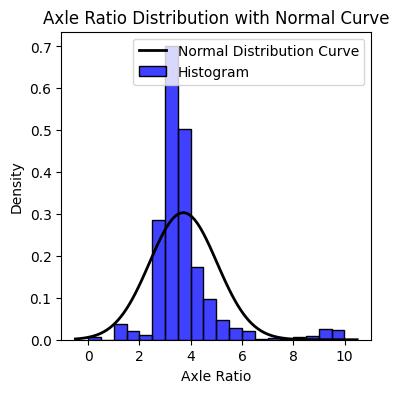

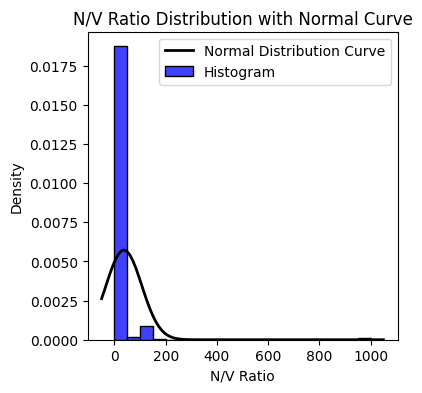

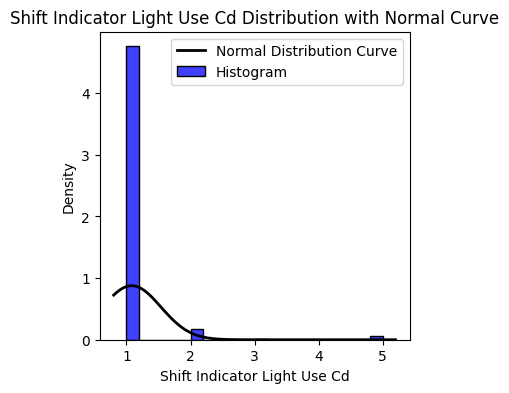

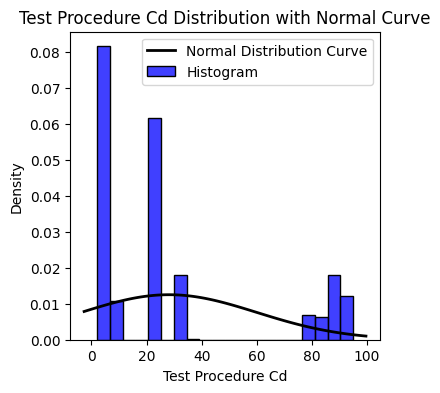

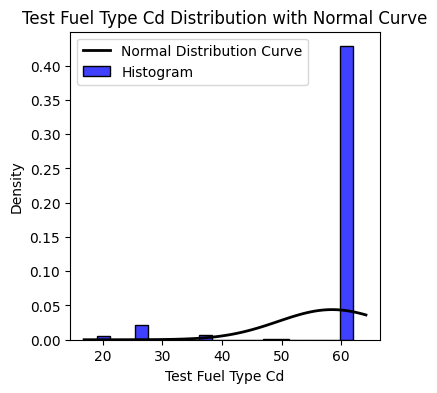

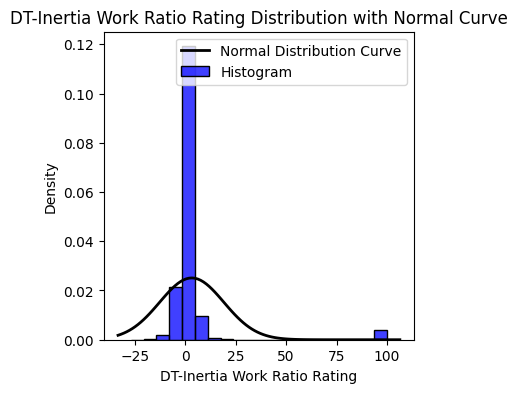

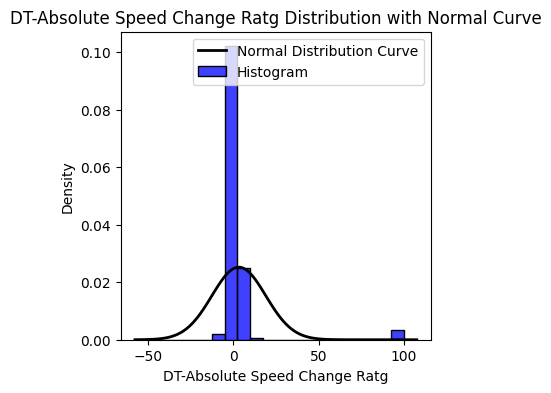

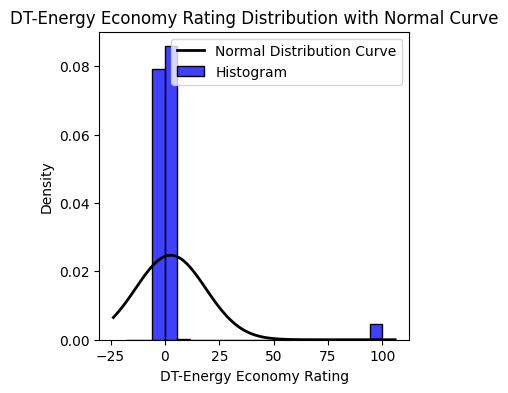

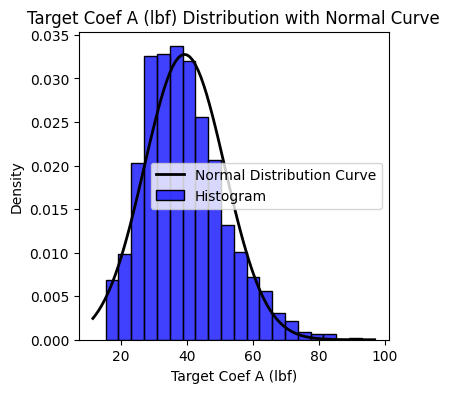

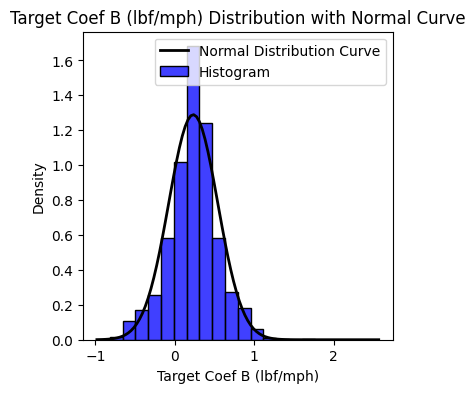

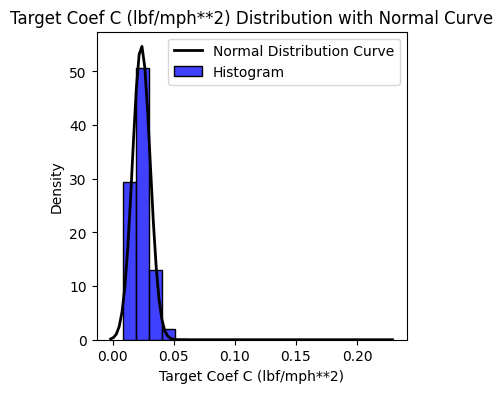

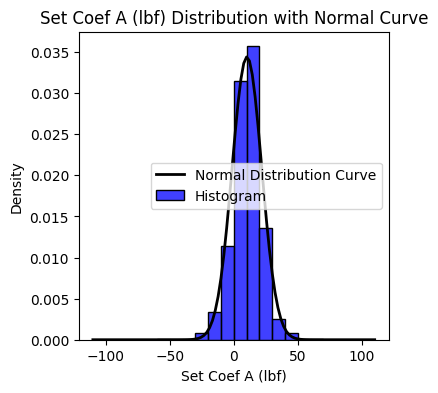

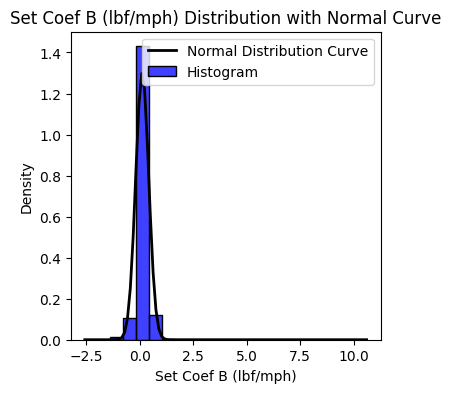

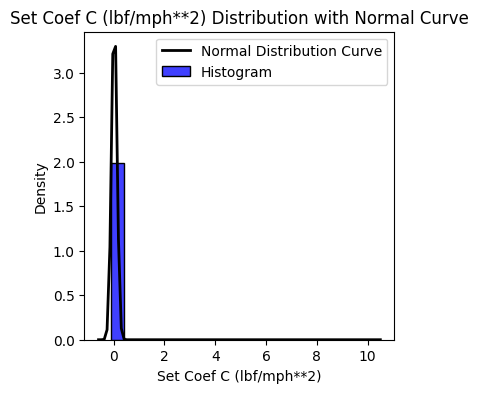

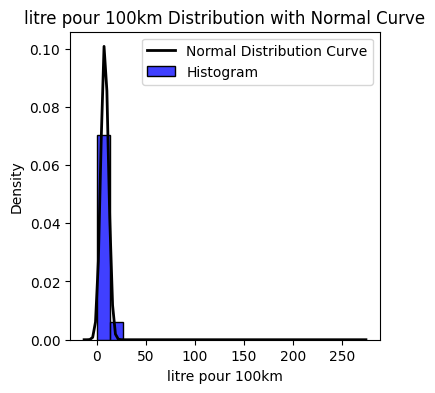

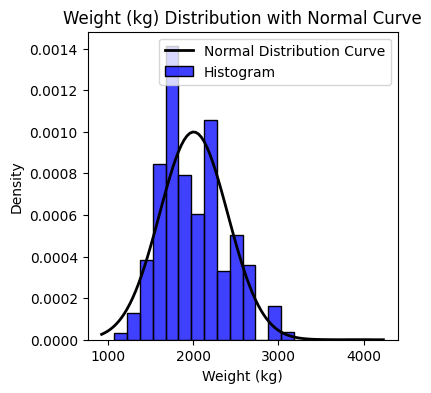

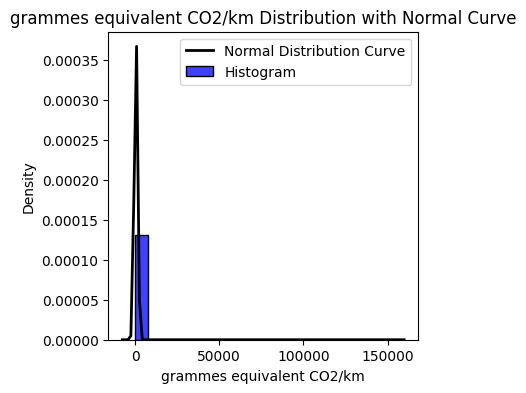

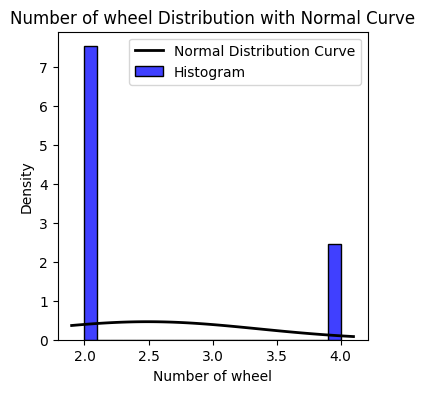

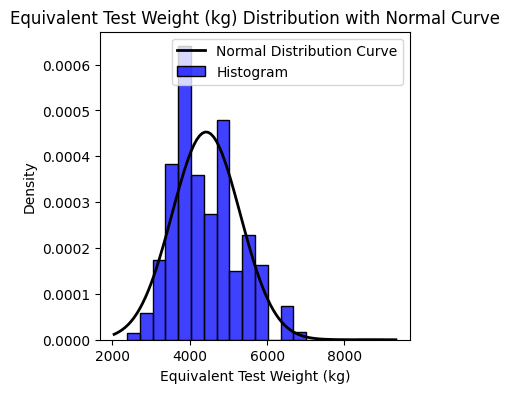

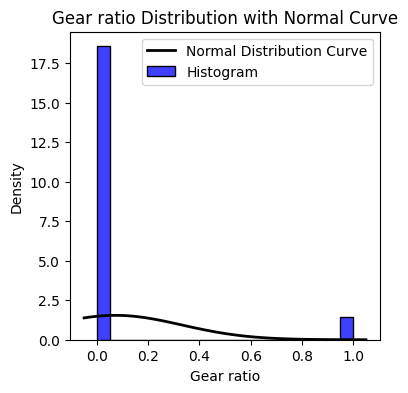

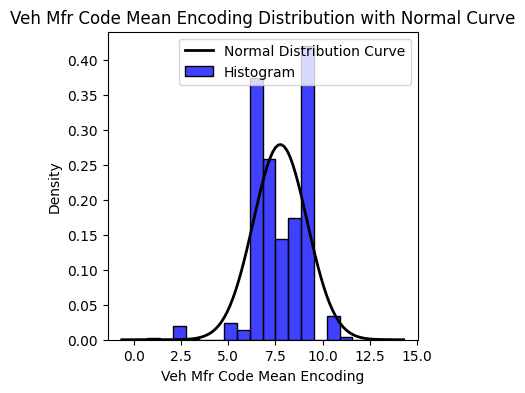

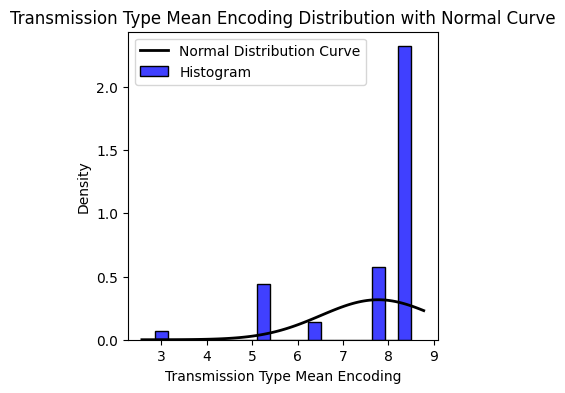

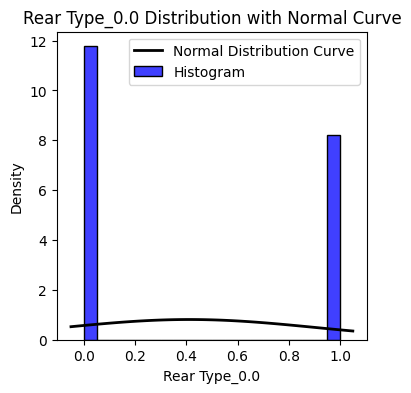

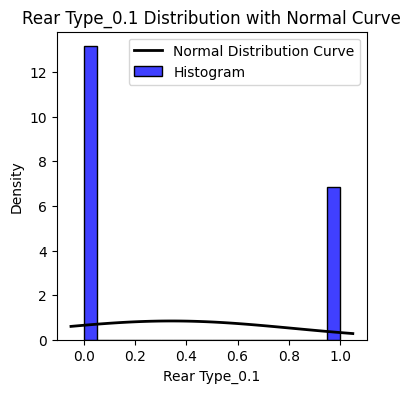

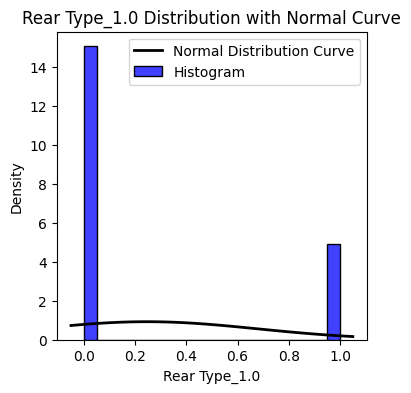

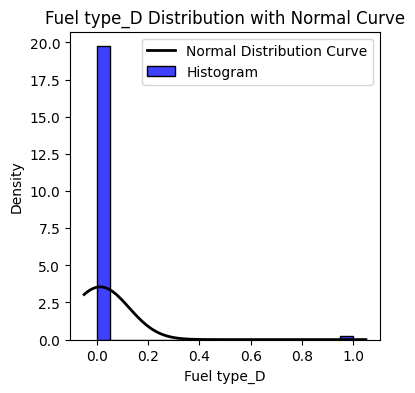

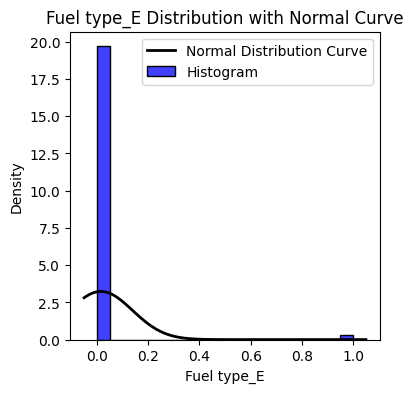

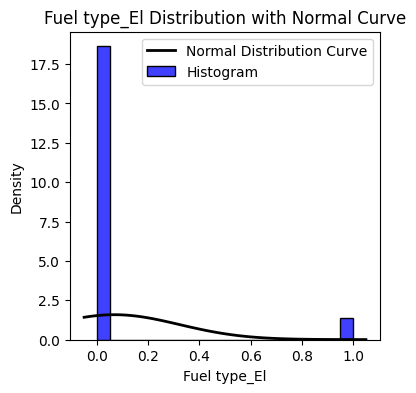

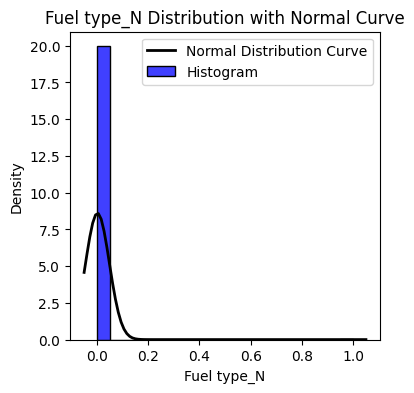

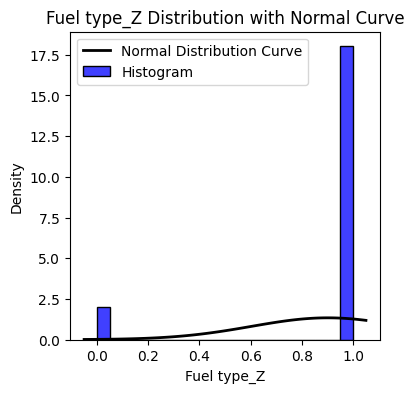

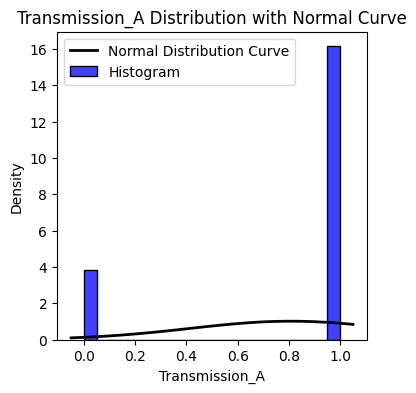

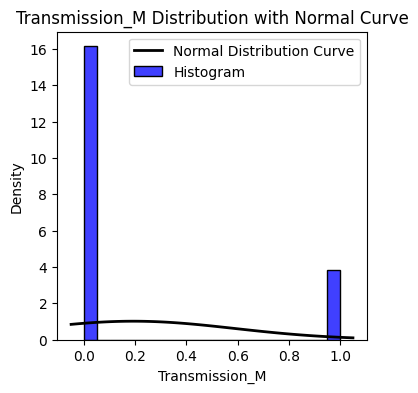

In [306]:
# Set up the number of subplots

# Loop over the columns
for column in df.columns:
    plt.figure(figsize=(4, 4))
    # Plot the histogram for the column
    sns.histplot(df[column], kde=False, color='blue', bins=20, stat="density", label="Histogram")
    
    # Fit the normal distribution
    mu, std = stats.norm.fit(df[column].dropna())  # Fit the normal distribution
    
    # Plot the normal distribution curve
    xmin, xmax = plt.xlim()  # Get the current x-axis limits
    x = np.linspace(xmin, xmax, 100)  # Generate x values
    p = stats.norm.pdf(x, mu, std)  # Compute the normal PDF
    plt.plot(x, p, 'k', linewidth=2, label="Normal Distribution Curve")
    
    # Set plot titles and labels
    plt.title(f"{column} Distribution with Normal Curve")
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.legend()
    plt.show()



In [307]:

# Shapiro-Wilk Test
print("p-value > 0.05 → Data is likely normal")
df_shapiro = pd.DataFrame({"column": [], "p-value": [], "statistic": []})
for column in df.columns:
    data = df[column].dropna()
    shapiro_test = stats.shapiro(data)
    df_shapiro = pd.concat([df_shapiro, pd.DataFrame({"column": [column], 
                                                       "p-value": [shapiro_test.pvalue], 
                                                       "statistic": [shapiro_test.statistic]})], ignore_index=True)
df_shapiro = df_shapiro.sort_values(by="p-value", ascending=False)

print(tabulate(df_shapiro, headers='keys', tablefmt='psql'))


p-value > 0.05 → Data is likely normal
+----+---------------------------------+--------------+-------------+
|    | column                          |      p-value |   statistic |
|----+---------------------------------+--------------+-------------|
| 15 | Target Coef B (lbf/mph)         | 5.65232e-48  |   0.986318  |
| 17 | Set Coef A (lbf)                | 1.15278e-60  |   0.972897  |
| 14 | Target Coef A (lbf)             | 1.20316e-61  |   0.971518  |
| 21 | Weight (kg)                     | 1.75029e-64  |   0.967196  |
| 24 | Equivalent Test Weight (kg)     | 1.75029e-64  |   0.967196  |
|  0 | Model Year                      | 1.30629e-77  |   0.939293  |
| 26 | Veh Mfr Code Mean Encoding      | 9.80475e-84  |   0.920568  |
|  2 | Rated Horsepower                | 7.65038e-92  |   0.888303  |
| 16 | Target Coef C (lbf/mph**2)      | 9.98099e-96  |   0.8692    |
|  4 | Number of Gears                 | 5.88013e-105 |   0.81205   |
|  3 | Number of Cylinders and Rotors  | 2.60127e-1

c:\Users\marcl\Documents\python_projects\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 35243.
  res = hypotest_fun_out(*samples, **kwds)


#### Identification des valeures extrêmes

In [308]:
normal_distribution_cols = df_shapiro[df_shapiro["p-value"]>0.05]["column"]
normal_distribution_cols

Series([], Name: column, dtype: object)

#### Suppression des valeurs extrêmes

In [309]:
# ...

## Valeurs extrêmes - distribution inconnue

* identifier les valeurs extrêmes (on utilise les quartiles)
* expliquer l'utilité (ou non) de ces valeurs extrêmes (*1)

*1:

Une valeur extrême (rare et hors norme) peut être très utile lorsque l'évènement associé et aussi rare et hors norme. Il y a peu de cancer mortelle mais lorsqu'il y a un cancer mortelle il faut absolument l'identifier. Ici, la valeur "mortelle" est extrême ET nécessaire. Il faut donc systématiquement trouver l'origine des valeures extrêmes (erreur dans la mesure ou réalité).


In [310]:
other_cols = df.columns.difference(normal_distribution_cols)

#### Identification

* extraction des colonnes catégoriques
* visualisation des colonnes ou les valeurs extrêmes semblent inintéressante

In [311]:
categorical_column = []
for column in other_cols:
    if df[column].nunique() < 60:
        categorical_column.append(column)
        print(f"{column} : {len(df[column].unique())}")

other_cols = other_cols.difference(categorical_column)

Model Year : 9
Number of Cylinders and Rotors : 10
Number of Gears : 9
Transmission Overdrive Code : 2
Shift Indicator Light Use Cd : 4
Test Procedure Cd : 16
Test Fuel Type Cd : 14
Weight (kg) : 26
Number of wheel : 2
Equivalent Test Weight (kg) : 26
Gear ratio : 2
Veh Mfr Code Mean Encoding : 45
Transmission Type Mean Encoding : 8
Rear Type_0.0 : 2
Rear Type_0.1 : 2
Rear Type_1.0 : 2
Fuel type_D : 2
Fuel type_E : 2
Fuel type_El : 2
Fuel type_N : 2
Fuel type_Z : 2
Transmission_A : 2
Transmission_M : 2


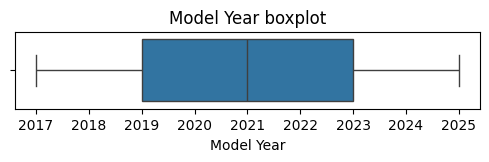

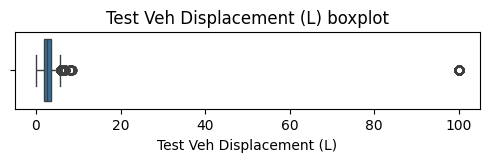

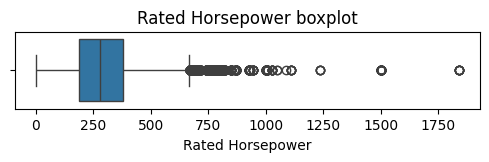

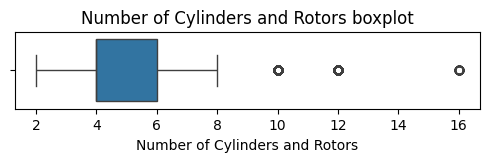

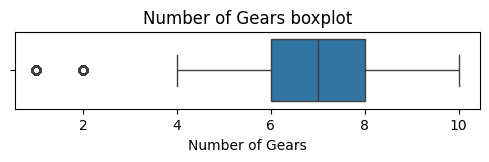

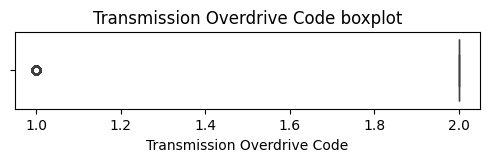

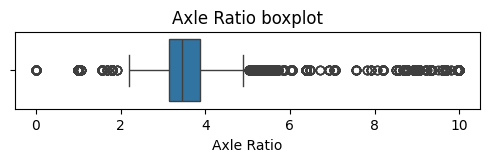

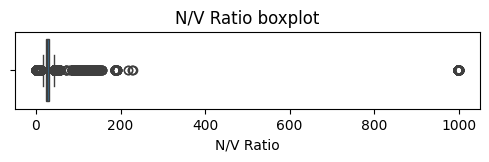

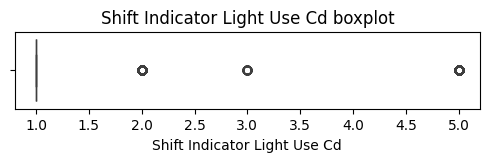

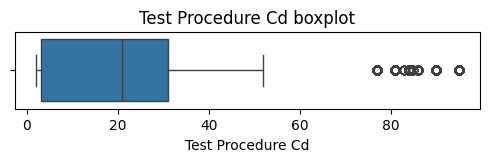

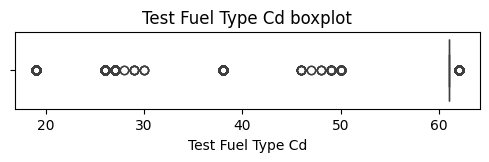

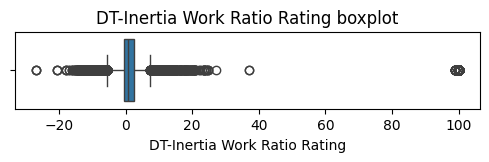

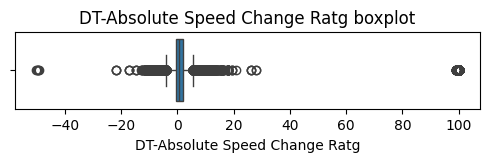

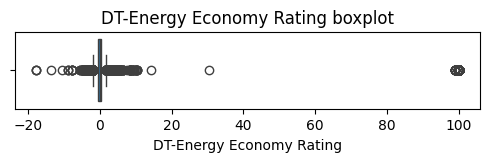

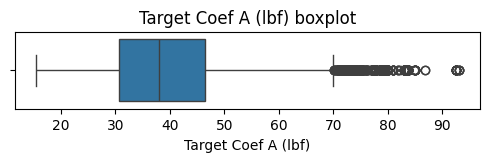

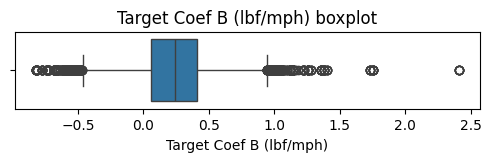

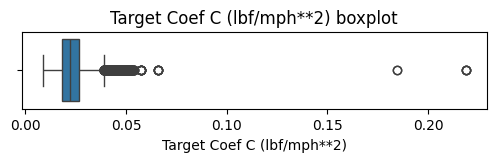

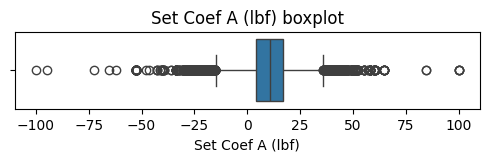

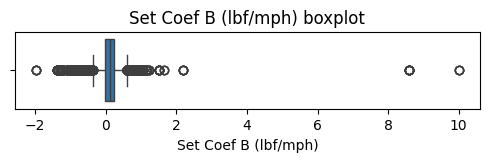

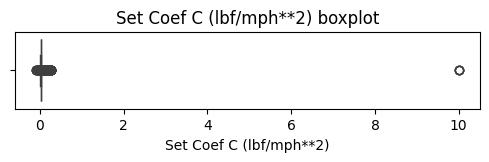

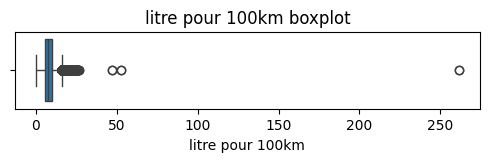

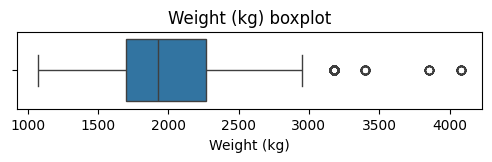

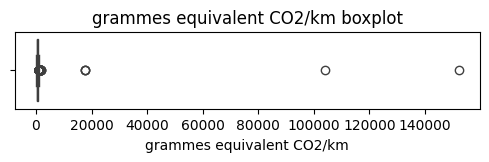

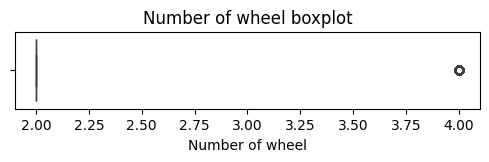

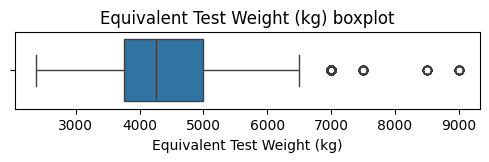

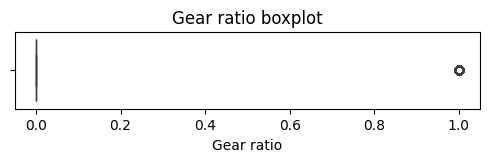

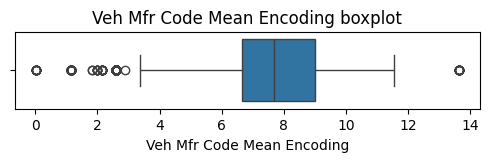

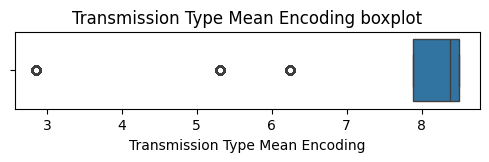

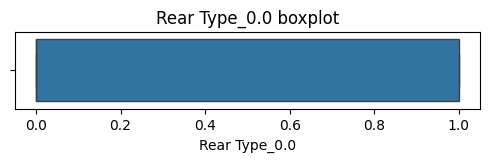

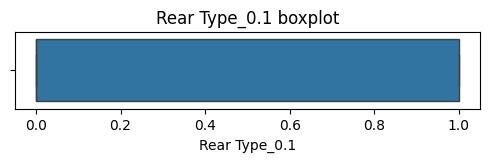

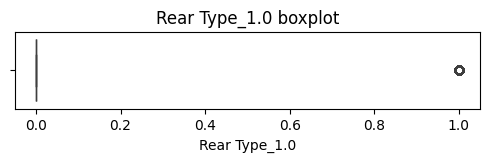

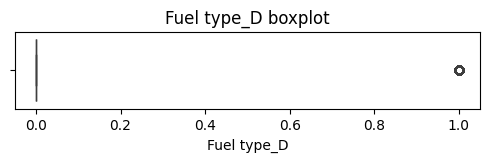

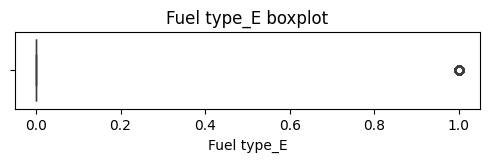

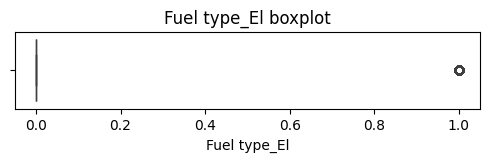

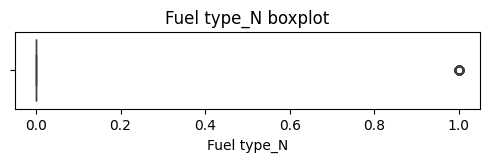

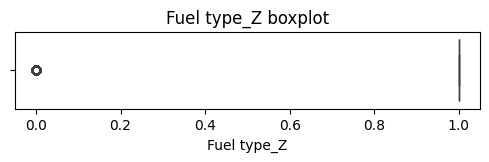

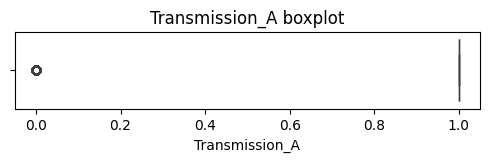

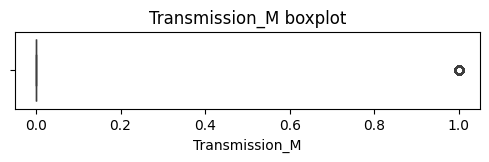

In [312]:
for col in df.columns:
    #plot the boxplot for each numerical column
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=df[col])
    plt.title(f"{col} boxplot")
    plt.show()

In [313]:
upper_quantile = 0.9
lower_quantile = 0.1

In [314]:
# for each numerical column, print the number of outliers
result = []
outlayers_border = {}
for col in df.columns:
    q1 = df[col].quantile(lower_quantile)
    q3 = df[col].quantile(upper_quantile)
    interquartilrange = q3 - q1
    lower_bound = q1 - 1.5*interquartilrange
    upper_bound = q3 + 1.5*interquartilrange
    total_outlaiers = len(df[(df[col]<lower_bound) | (df[col]>upper_bound)])
    outlayers_border[col] = (lower_bound, upper_bound)
    result.append((col,total_outlaiers,(total_outlaiers*100/df.shape[0]), lower_bound, upper_bound))
print(tabulate(result, headers=["Column", "Number of outliers", "Ratio of outliers in %", "lower limit", "upper limit"]))

Column                             Number of outliers    Ratio of outliers in %    lower limit    upper limit
-------------------------------  --------------------  ------------------------  -------------  -------------
Model Year                                          0                 0           2006.5         2034.5
Test Veh Displacement (L)                         293                 0.831371      -4.05          10.75
Rated Horsepower                                   60                 0.170247    -417           1087
Number of Cylinders and Rotors                     42                 0.119173      -2             14
Number of Gears                                     0                 0            -11             21
Transmission Overdrive Code                      2541                 7.20994        2              2
Axle Ratio                                       1132                 3.21199       -0.19           7.81
N/V Ratio                                        2094     

In [315]:
# Function to categorize values
def categorize_value(x, col):
    if col in outlayers_border:    
        if x < outlayers_border[col][0]:
            return 1
        elif x > outlayers_border[col][1]:
            return -1
    return 0
        

# Apply transformation only to selected columns
df_extreme = df.copy()

for col in df.columns:
    df_extreme[col] = df_extreme[col].apply(lambda x: categorize_value(x, col))


# sum all the values for each line on a line
number_none_exetreme_values = df_extreme[other_cols].sum(axis=1)
number_none_exetreme_values = number_none_exetreme_values[number_none_exetreme_values==0]
print(f"le nombre de lignes ne possédant aucune valeur extrême est de: {len(number_none_exetreme_values)}")



le nombre de lignes ne possédant aucune valeur extrême est de: 31356


#### Explication

les valeurs extrêmes identifées sont dans les colonnes:
* 

Premièremement on tente de voir si cet évènement extrême à un impact sur notre target (une maison 15m c'est extrême mais pas très intéressant pour connaître la température)
1. on construit un dataset des valeures extrêmes.
2. on regarde si la valeur extrêmes d'une colonne amène une valeur extrême dans le target

Pour trouver l'explication on tente d'identifier la présence d'évènement extrêmes
* évènement affectant plusieurs colonnes (un anti cyclone affecte les vents, la température...)
1. on créé un dataset qui comptabilise uniquement si l'évènement est extrême
2. on regard si effectivement ces valeurs extrêmes sont communes à plusieurs colonnes
3. on réduit les colonnes en fonction (apparition d'une colonne cyclone ou suppression des valeures extrêmes)

##### Cet extrême se reflète dans le target?

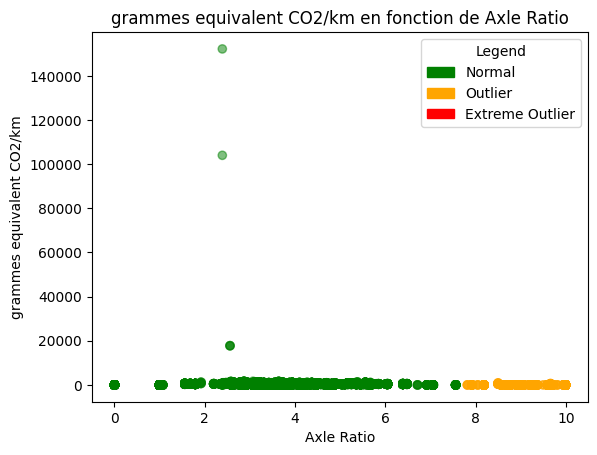

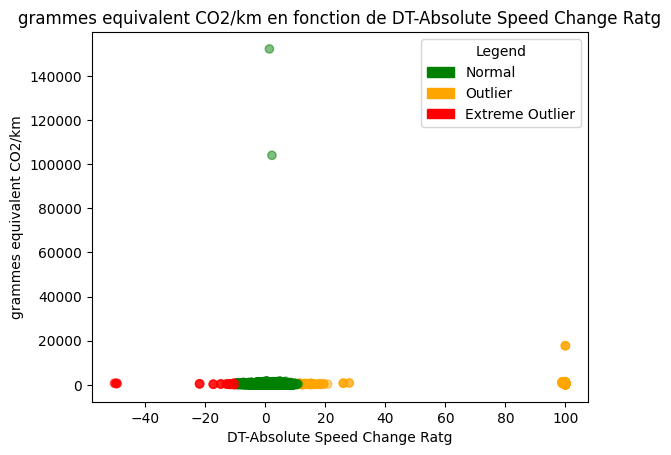

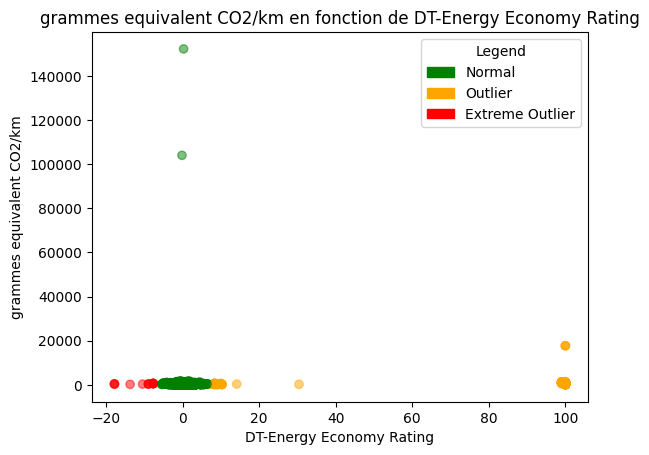

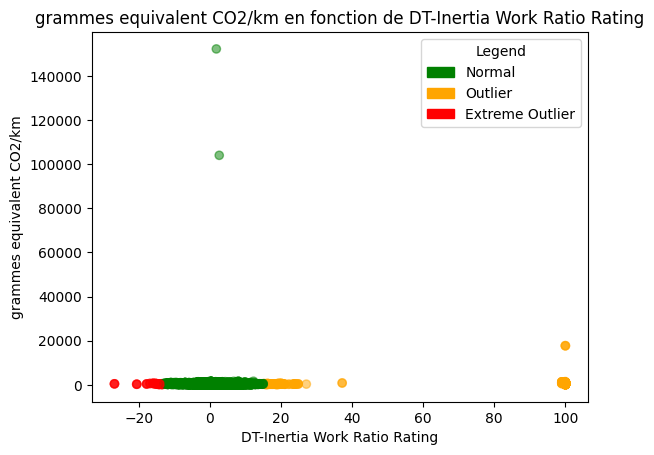

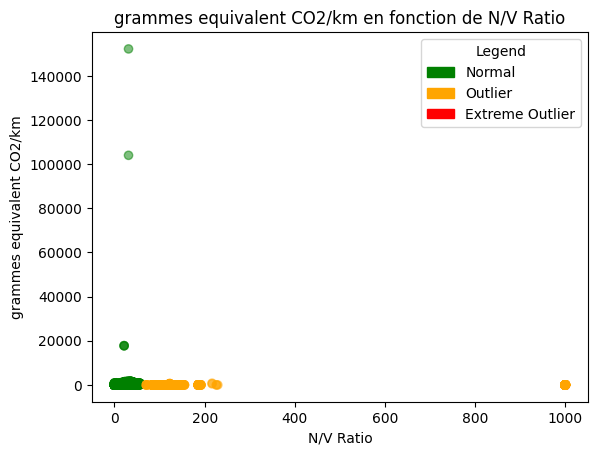

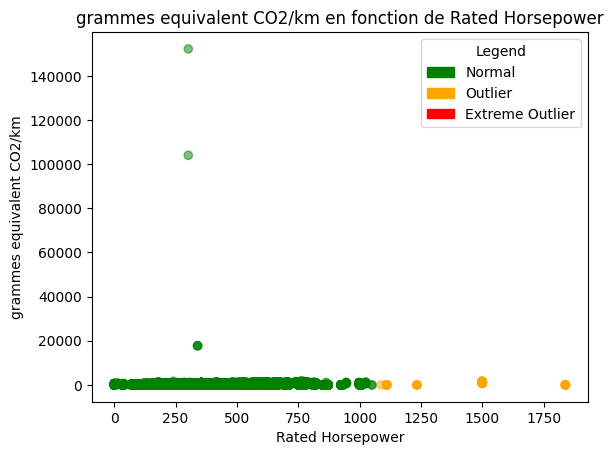

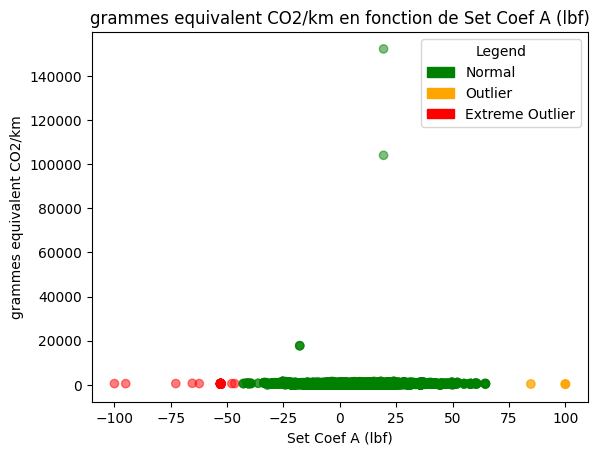

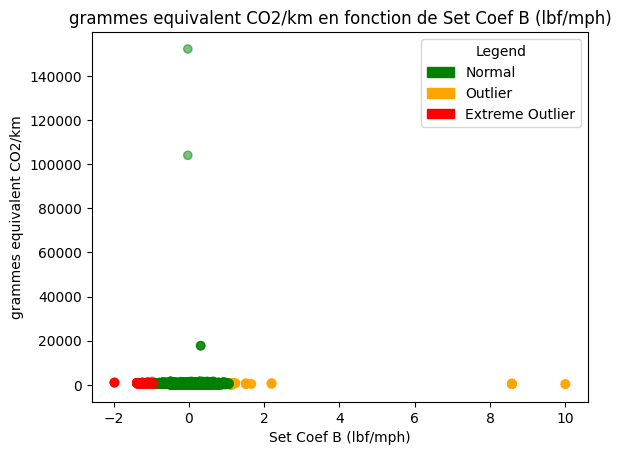

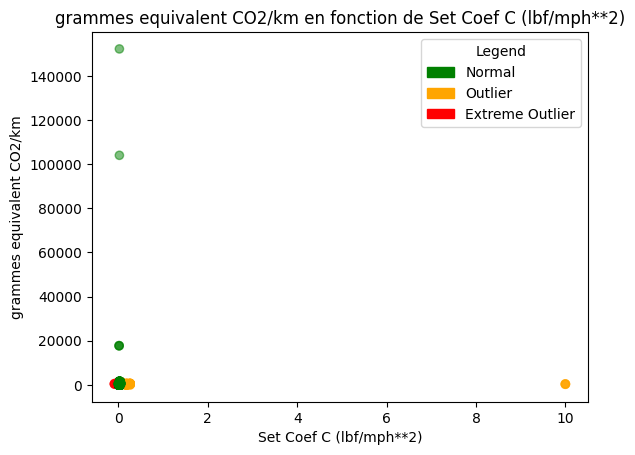

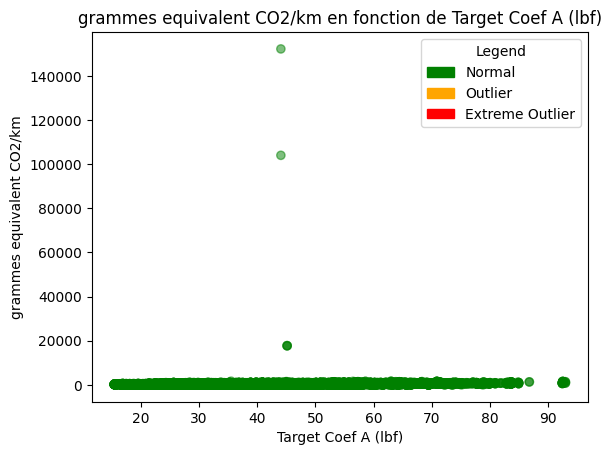

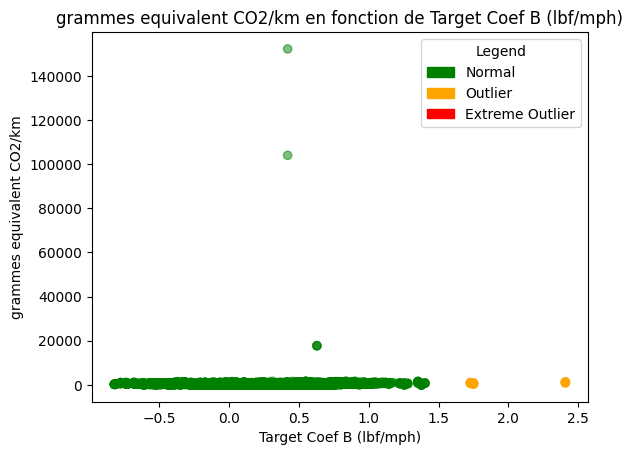

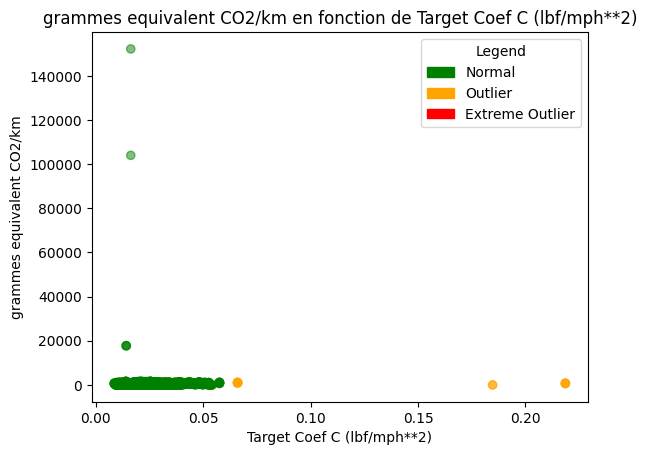

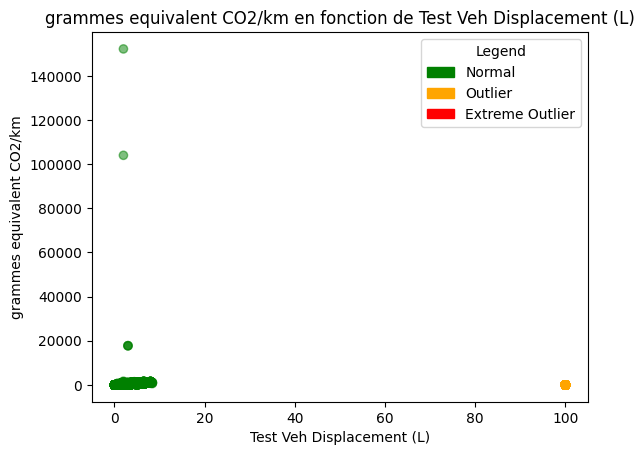

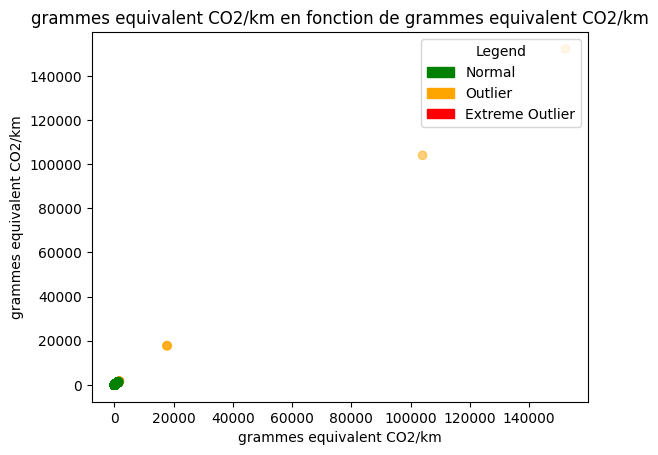

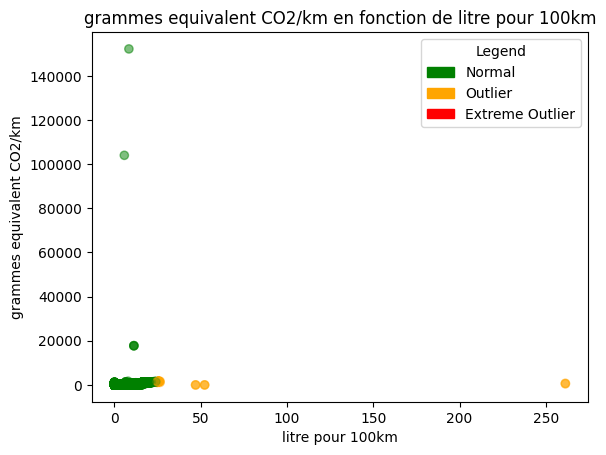

In [316]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# Define the custom colormap
cmap = ListedColormap(["green", "red"])


for col in other_cols:
    plt.scatter(df[col], df['grammes equivalent CO2/km'], 
                c=['red' if val == 1 else 'orange' if val == -1 else 'green' for val in df_extreme[col]], 
                alpha=0.5)

    plt.xlabel(col)
    plt.ylabel('grammes equivalent CO2/km')
    legend_labels = ['Normal', 'Outlier', 'Extreme Outlier']
    legend_colors = ['green', 'orange', 'red']
    legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]

    # Add the legend
    plt.legend(handles=legend_patches, title="Legend", loc="upper right")    
    plt.title(f'grammes equivalent CO2/km en fonction de {col}')
    plt.show()


ces valeurs extrêmes n'ont pas l'air d'avoir d'impact sur la pollution

##### Cet extrême fait-il partie d'un évènement extrême?

In [317]:
df_extreme.columns

Index(['Model Year', 'Test Veh Displacement (L)', 'Rated Horsepower',
       'Number of Cylinders and Rotors', 'Number of Gears',
       'Transmission Overdrive Code', 'Axle Ratio', 'N/V Ratio',
       'Shift Indicator Light Use Cd', 'Test Procedure Cd',
       'Test Fuel Type Cd', 'DT-Inertia Work Ratio Rating',
       'DT-Absolute Speed Change Ratg', 'DT-Energy Economy Rating',
       'Target Coef A (lbf)', 'Target Coef B (lbf/mph)',
       'Target Coef C (lbf/mph**2)', 'Set Coef A (lbf)',
       'Set Coef B (lbf/mph)', 'Set Coef C (lbf/mph**2)', 'litre pour 100km',
       'Weight (kg)', 'grammes equivalent CO2/km', 'Number of wheel',
       'Equivalent Test Weight (kg)', 'Gear ratio',
       'Veh Mfr Code Mean Encoding', 'Transmission Type Mean Encoding',
       'Rear Type_0.0', 'Rear Type_0.1', 'Rear Type_1.0', 'Fuel type_D',
       'Fuel type_E', 'Fuel type_El', 'Fuel type_N', 'Fuel type_Z',
       'Transmission_A', 'Transmission_M'],
      dtype='object')

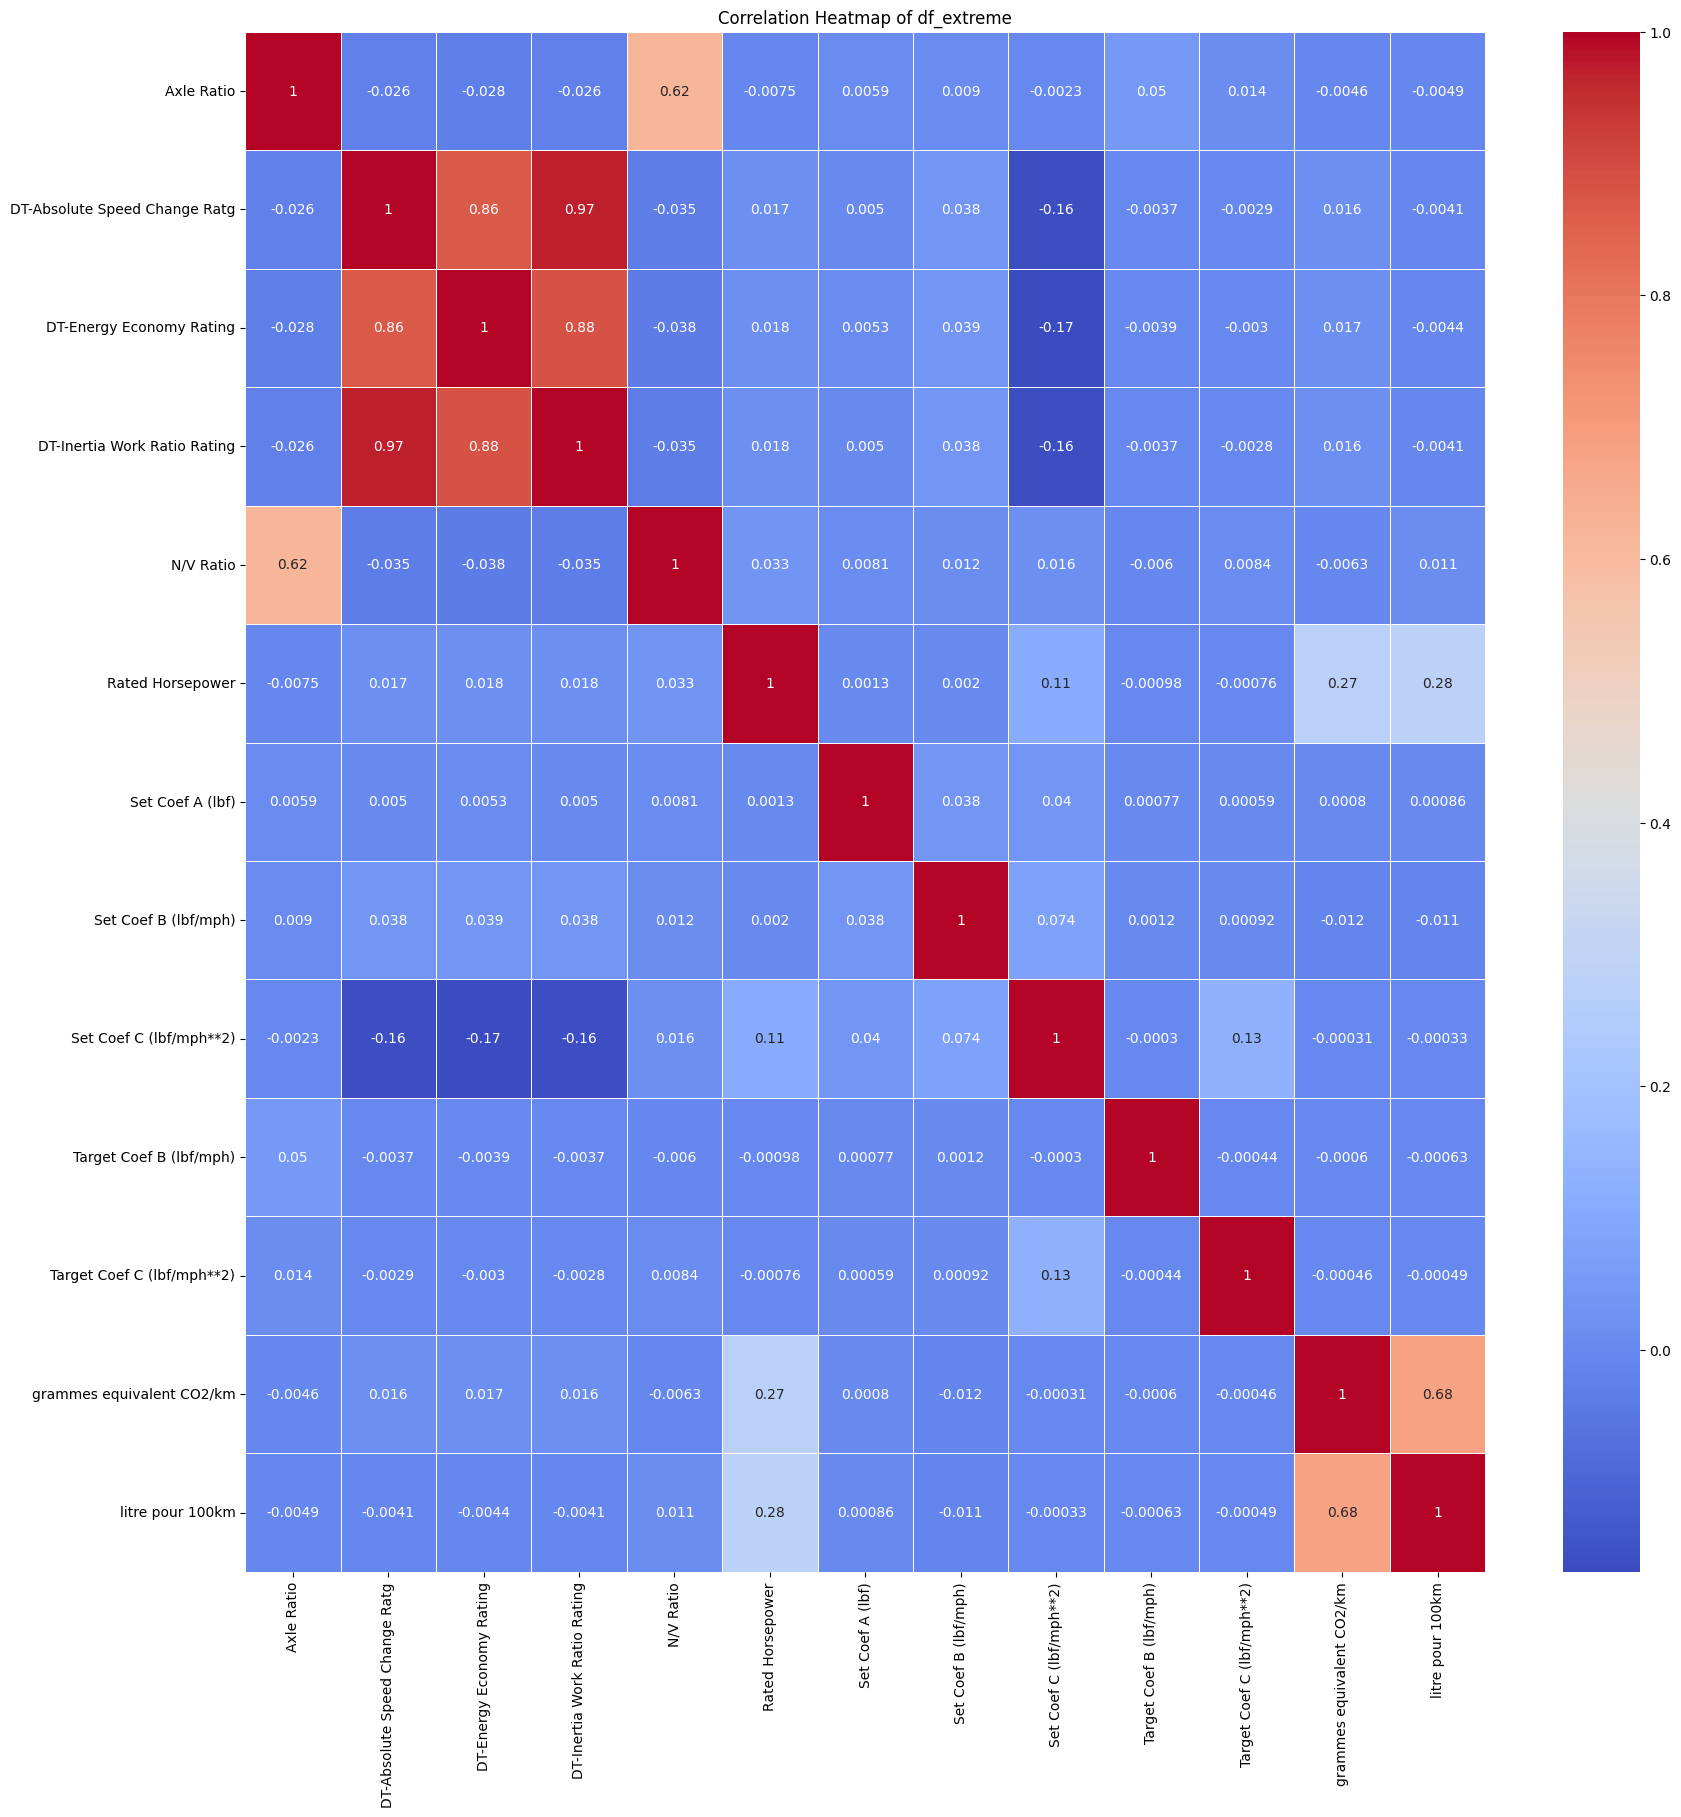

In [318]:
plt.figure(figsize=(20, 20))  # Adjust width and height as needed
sns.heatmap(df_extreme[['Axle Ratio', 'DT-Absolute Speed Change Ratg',
       'DT-Energy Economy Rating', 'DT-Inertia Work Ratio Rating', 'N/V Ratio',
       'Rated Horsepower', 'Set Coef A (lbf)', 'Set Coef B (lbf/mph)',
       'Set Coef C (lbf/mph**2)', 'Target Coef B (lbf/mph)', 'Target Coef C (lbf/mph**2)',
       'grammes equivalent CO2/km',
       'litre pour 100km']].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of df_extreme")
plt.show()

Non

In [319]:
df.columns

Index(['Model Year', 'Test Veh Displacement (L)', 'Rated Horsepower',
       'Number of Cylinders and Rotors', 'Number of Gears',
       'Transmission Overdrive Code', 'Axle Ratio', 'N/V Ratio',
       'Shift Indicator Light Use Cd', 'Test Procedure Cd',
       'Test Fuel Type Cd', 'DT-Inertia Work Ratio Rating',
       'DT-Absolute Speed Change Ratg', 'DT-Energy Economy Rating',
       'Target Coef A (lbf)', 'Target Coef B (lbf/mph)',
       'Target Coef C (lbf/mph**2)', 'Set Coef A (lbf)',
       'Set Coef B (lbf/mph)', 'Set Coef C (lbf/mph**2)', 'litre pour 100km',
       'Weight (kg)', 'grammes equivalent CO2/km', 'Number of wheel',
       'Equivalent Test Weight (kg)', 'Gear ratio',
       'Veh Mfr Code Mean Encoding', 'Transmission Type Mean Encoding',
       'Rear Type_0.0', 'Rear Type_0.1', 'Rear Type_1.0', 'Fuel type_D',
       'Fuel type_E', 'Fuel type_El', 'Fuel type_N', 'Fuel type_Z',
       'Transmission_A', 'Transmission_M'],
      dtype='object')

### Supression des valeurs extrêmes

In [320]:
for col in ['Rated Horsepower', 
       'Axle Ratio', 'N/V Ratio',
       'Shift Indicator Light Use Cd', 'Test Procedure Cd',
       'Test Fuel Type Cd', 'DT-Inertia Work Ratio Rating',
       'DT-Absolute Speed Change Ratg', 'DT-Energy Economy Rating',
       'Target Coef A (lbf)', 'Target Coef B (lbf/mph)',
       'Target Coef C (lbf/mph**2)', 'Set Coef A (lbf)',
       'Set Coef B (lbf/mph)', 'Set Coef C (lbf/mph**2)', 'litre pour 100km',
       'Weight (kg)', 'grammes equivalent CO2/km', 'Number of wheel',
       'Equivalent Test Weight (kg)', 'Gear ratio'
       'Number of Cylinders and Rotors']:
    if col in outlayers_border:
        q1 = outlayers_border[col][0]
        q3 = outlayers_border[col][1]
        interquartilrange = q3 - q1
        lower_bound = q1 - 2*interquartilrange
        upper_bound = q3 + 2*interquartilrange
        total_outlaiers = len(df[(df[col]<lower_bound) | (df[col]>upper_bound)])
        rate = total_outlaiers/df.shape[0]
        if rate < 0.1:
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
df.shape
df["Fuel type_El"].value_counts()


Fuel type_El
0.0    30200
1.0     2240
Name: count, dtype: int64

## Bruit

* 

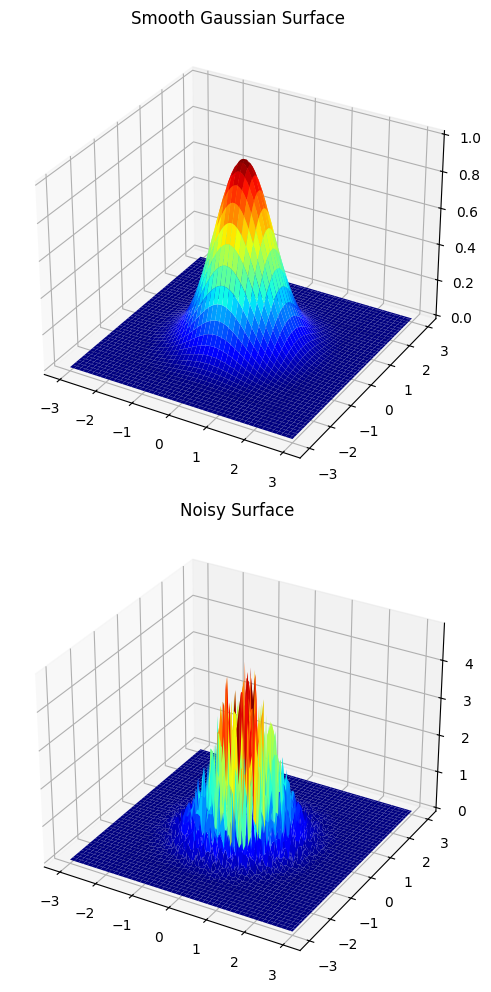

In [321]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate grid data
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Define two different surface functions
Z1 = np.exp(-X**2 - Y**2)  # Smooth Gaussian-like surface
Z2 = np.random.rand(*X.shape) * np.exp(-X**2 - Y**2) * 5  # Noisy surface

fig = plt.figure(figsize=(8, 10))

# First subplot (smooth function)
ax1 = fig.add_subplot(211, projection='3d')
ax1.plot_surface(X, Y, Z1, cmap='jet', edgecolor='none')
ax1.set_title('Smooth Gaussian Surface')

# Second subplot (rough terrain-like function)
ax2 = fig.add_subplot(212, projection='3d')
ax2.plot_surface(X, Y, Z2, cmap='jet', edgecolor='none')
ax2.set_title('Noisy Surface')

plt.tight_layout()
plt.show()


## Abbérations

* abbérations logique (salaire négatif)

## Enregistrement

le dataset final doit:
* ne plus avoir de valeur null
* ne plus avoir d'abbération ou de bruit
* ne plus avoir de valeurs extrêmes

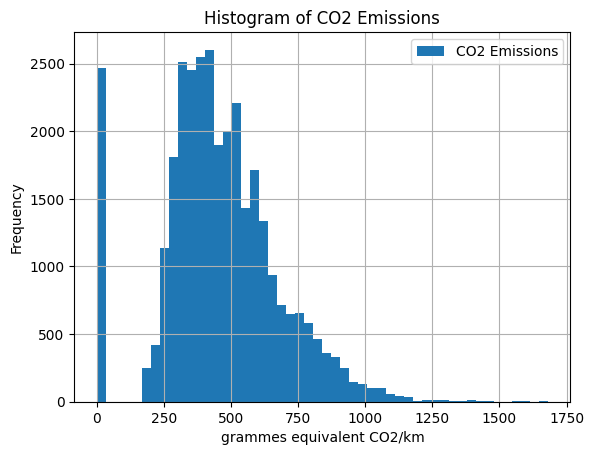

In [322]:
df["grammes equivalent CO2/km"].hist(bins=50, label="CO2 Emissions")  # Increase bins for thinner bars
plt.legend()  # Add legend
plt.xlabel("grammes equivalent CO2/km")  # Optional: Label for x-axis
plt.ylabel("Frequency")  # Optional: Label for y-axis
plt.title("Histogram of CO2 Emissions")  # Optional: Add a title
plt.show()  # Display the plot

In [323]:
df.to_csv("./results/df_cleaned.csv", index=False)